In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
# Filter out warning messages
warnings.filterwarnings("ignore")



In [2]:
## Train

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data_backup=data

In [257]:
data.head()

ID  Year  Month  Hospital  Sample  ICU  OPD  Sex  Age  Ethnicity  ...  \
0   1  2018     11         7       1    2    2    2   53          1  ...   
1   2  2018      1         7       1    2    2    1   17          1  ...   
2   3  2018      5         7       1    2    2    1   47          1  ...   
3   4  2018      1         7       1    2    2    1   21          1  ...   
4   5  2016      8         7       1    2    1    1   99          1  ...   

   FU_L.interrogansserovarMankarsostr.Mankarso  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.santarosaiserovarGeorgiastr.LT117  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   FU_L.santarosaiserovarPyrogenesstr.Salinem  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   FU_L.interrogansserovarBataviaestr.VanTienan  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   FU_L.interrogansserovarAlexistr.616  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   FU_L.interrogansserovarAustralisstr.Ballico  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.interrogansserovarwolfiistr.3705  FU_L.interrogansserovarWeerasinghe  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

   FU_Patoc  Final  
0       NaN      2  
1       NaN      1  
2       NaN      2  
3       NaN      2  
4       NaN      2  

[5 rows x 806 columns]

In [258]:
data.shape

(1387, 806)

## a. Do a thorough descriptive analysis and identify the patterns and potential significant variables. Use appropriate plots and tables

In [259]:
# Identify Catergorical and Quantitative variables and their counts

In [260]:

categorical_vars = []
continuous_vars = []


for column in data.columns:

    unique_values = data[column].nunique()
    

    if data[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)


num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)


print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')



Total Variables: 806
Categorical Variables: 557
Continuous Variables: 249


In [261]:
## There are initially 557 cat and 249 cts vars in the data set

## PPEPROCESSING

In [262]:
data = data.drop('ID', axis=1)

In [263]:
## After removing ID reduced to ontinuous Variables: 248

In [264]:
data.replace(['99', 99], np.nan, inplace=True)

In [265]:
## CONSIDER ALL THE ENTRIES OF 99 AS MISSING VALUES

In [266]:
data.isna().mean()*100

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.984138
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 805, dtype: float64

In [267]:
## We can see that missing values in the data set

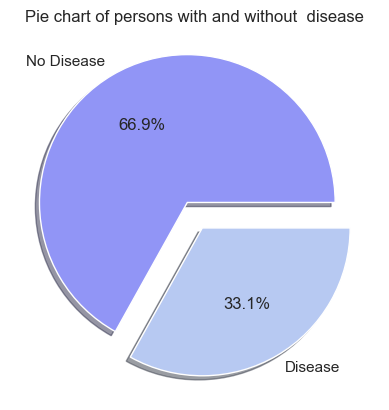

In [268]:
#pie chart of response variable
plt.pie(data['Final'].value_counts(), labels=['No Disease', 'Disease'], colors=['#9195F6', '#B7C9F2'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True);
plt.title("Pie chart of persons with and without  disease");

1	Confirmed
2	Not detected
## There is a class inbalance in this data set we need to address that issue

## Note

This pie chart illustrate, that the response variable is quite imbalanced which leads to biased prediction towards majority class.After applying SMOTE ,UPSAMPLING and DOWNSAMPLING to obtained balanced data  and to get rid of the issue of imbalanceness of the response variable,the train accuracy and test accuracies are getting lower. and also the gap between those to values are also increased .
Therefore it can be concluded that the model where non of the above sampling methods were accurately predict the unseen data set tan Original data set

In [149]:
#  print("Categorical Variables:", categorical_vars)

In [150]:
# print("Continuous Variables:", continuous_vars)

## Univariate analysis

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


present_continuous_vars = [var for var in continuous_vars if var in data.columns]

num_cols = 2

num_rows = (len(present_continuous_vars) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, var in enumerate(present_continuous_vars):
    # Histogram
    sns.histplot(data[var], ax=axes[i*num_cols], kde=True)
    axes[i*num_cols].set_title(f'Histogram of {var}')
    axes[i*num_cols].set_xlabel(var)
    axes[i*num_cols].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(data[var], ax=axes[i*num_cols+1])
    axes[i*num_cols+1].set_title(f'Boxplot of {var}')
    axes[i*num_cols+1].set_xlabel(var)
    axes[i*num_cols+1].set_ylabel('')
    

plt.tight_layout()
plt.show()


IndexError: index 248 is out of bounds for axis 0 with size 248

In [ ]:
## We can see that most of the distributions are skewed hence we need to scale the variables before applying dimension reduction techniques such as PCA  or model fitting

## Note

Since the variables shows skewed distributions,
seperate models were fitted after applying standurd scaling and without applying standurd scaling.
but the model where fitted after applying standurd scaling provide a higher accuracy


univariate analysis for catergorical variables

In [ ]:
## MOST OF THE VARIABLES ARE BINARY CLASS CATERGORICAL VARIABLES  WITH REPREENTING CLASS 2 MOST OF THE TIME NEGETIVE OF THE ATTRIBUTE

## Bivariate Distribution

In [80]:

class_2_data = data[data['Final'] == 2]
class_1_data = data[data['Final'] == 1]

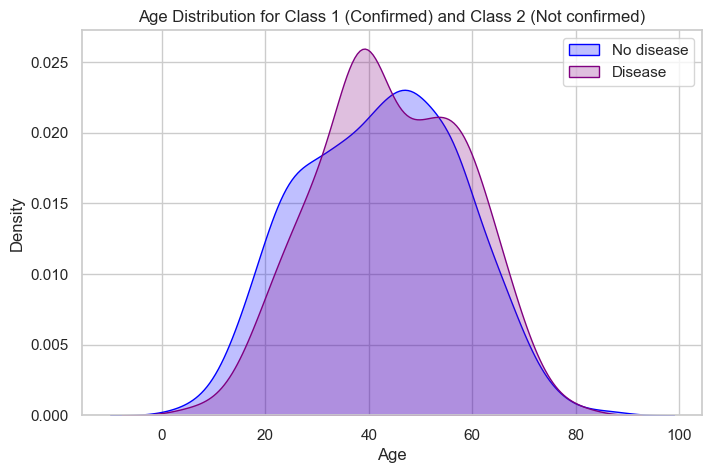

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['Age'], color='blue', shade=True, label='No disease')
sns.kdeplot(class_1_data['Age'], color='purple', shade=True, label='Disease')


plt.title('Age Distribution for Class 1 (Confirmed) and Class 2 (Not confirmed)')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()


plt.show()


In [82]:
# Approximately moew old people are suffering from dicease,younger people are less likely to suffering from the dicease byt there is a bpeak for Disease patients arount Age is 40

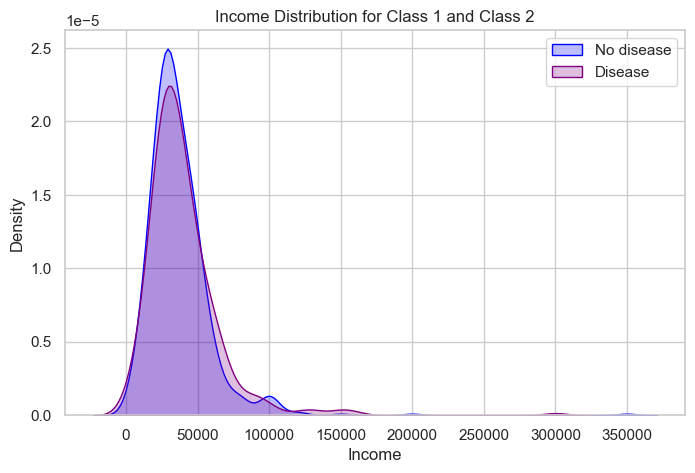

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['Income'], color='blue', shade=True, label='No disease')
sns.kdeplot(class_1_data['Income'], color='purple', shade=True, label='Disease')


plt.title('Income Distribution for Class 1 and Class 2')
plt.xlabel('Income')
plt.ylabel('Density')


plt.legend()


plt.show()


In [84]:
# Approximately moew old people are suffering from dicease,younger people are less likely to suffering from the dicease byt there is a bpeak for Disease patients arount Age is 40

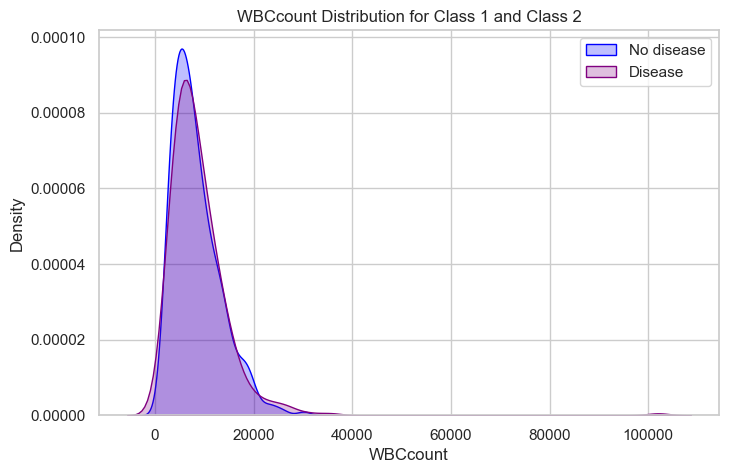

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt




sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['WBCcount'], color='blue', shade=True, label='No disease')


sns.kdeplot(class_1_data['WBCcount'], color='purple', shade=True, label='Disease')


plt.title('WBCcount Distribution for Class 1 and Class 2')
plt.xlabel('WBCcount')
plt.ylabel('Density')


plt.legend()


plt.show()


Final         1         2
Sex                      
1.0    0.364185  0.635815
2.0    0.266129  0.733871
Final    1    2
Sex            
1.0    362  632
2.0     66  182


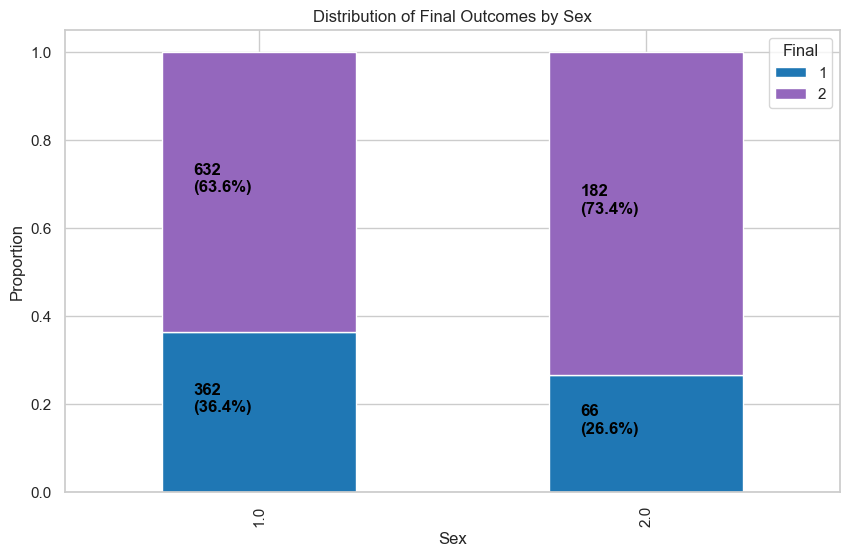

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cross_tab_prop = pd.crosstab(index=data['Sex'],
                             columns=data['Final'],
                             normalize="index")
print(cross_tab_prop)

cross_tab = pd.crosstab(index=data['Sex'],
                        columns=data['Final'])
print(cross_tab)

custom_colors = ['#1f77b4', '#9467bd']

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=custom_colors, 
                    figsize=(10, 6))

plt.legend(title='Final')
plt.xlabel("Sex")
plt.ylabel("Proportion")
plt.title("Distribution of Final Outcomes by Sex")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
# Show plot
plt.show()


Final             1         2
Ethnicity                    
1.0        0.350727  0.649273
2.0        0.289474  0.710526
3.0        0.137931  0.862069
6.0        0.333333  0.666667
Final        1    2
Ethnicity          
1.0        410  759
2.0         11   27
3.0          4   25
6.0          2    4


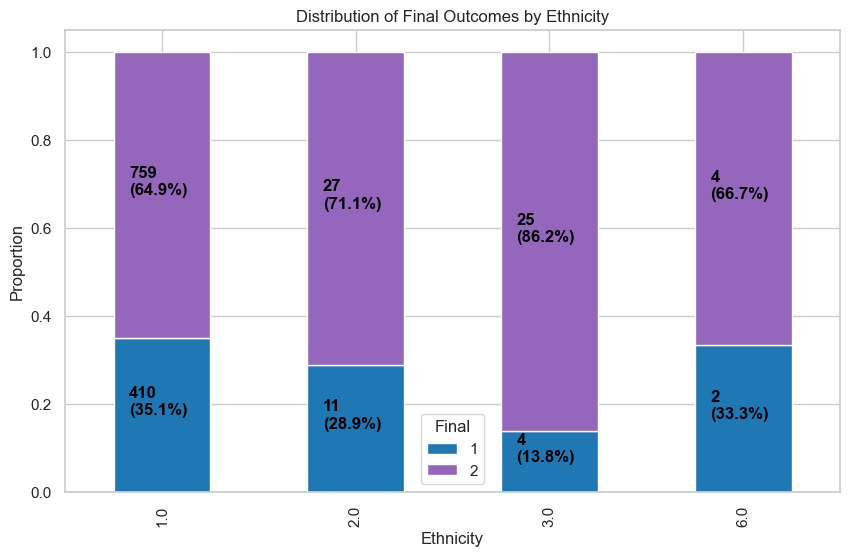

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cross_tab_prop = pd.crosstab(index=data['Ethnicity'],
                             columns=data['Final'],
                             normalize="index")
print(cross_tab_prop)


cross_tab = pd.crosstab(index=data['Ethnicity'],
                        columns=data['Final'])
print(cross_tab)

custom_colors = ['#1f77b4', '#9467bd'] 


cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=custom_colors, 
                    figsize=(10, 6))


plt.legend(title='Final')
plt.xlabel("Ethnicity")
plt.ylabel("Proportion")
plt.title("Distribution of Final Outcomes by Ethnicity")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
# Show plot
plt.show()


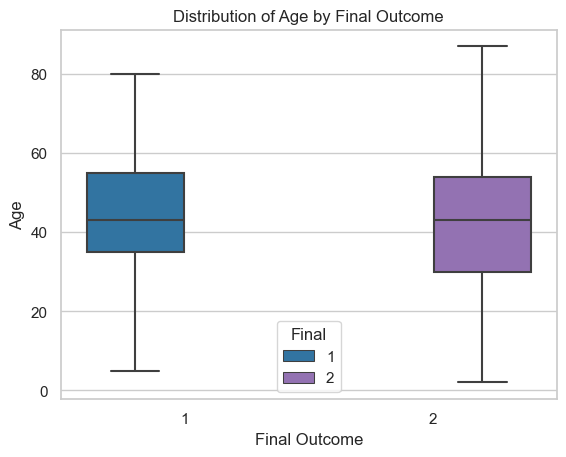

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = ["#1f77b4", "#9467bd"]


var = 'Age'


sns.boxplot(x='Final', y=var, data=data, hue='Final', palette=custom_palette)


plt.xlabel("Final Outcome")
plt.ylabel("Age")
plt.title("Distribution of Age by Final Outcome")


plt.show()


In [269]:
data

Year  Month  Hospital  Sample  ICU  OPD  Sex   Age  Ethnicity   Income  \
0     2018     11         7       1  2.0  2.0  2.0  53.0        1.0  35000.0   
1     2018      1         7       1  2.0  2.0  1.0  17.0        1.0      NaN   
2     2018      5         7       1  2.0  2.0  1.0  47.0        1.0  40000.0   
3     2018      1         7       1  2.0  2.0  1.0  21.0        1.0  30000.0   
4     2016      8         7       1  2.0  1.0  1.0   NaN        1.0      NaN   
...    ...    ...       ...     ...  ...  ...  ...   ...        ...      ...   
1382  2019      8         4       2  2.0  2.0  1.0  62.0        1.0      NaN   
1383  2018     11         7       1  2.0  2.0  2.0  59.0        2.0      NaN   
1384  2017      9         5       1  2.0  1.0  1.0  56.0        1.0   5000.0   
1385  2019      4         4       2  2.0  2.0  1.0  61.0        1.0      NaN   
1386  2017      8         8       1  2.0  2.0  1.0  36.0        1.0  30000.0   

      ...  FU_L.interrogansserovarMankarsostr.Mankarso  \
0     ...                                          NaN   
1     ...                                          NaN   
2     ...                                          NaN   
3     ...                                          NaN   
4     ...                                          NaN   
...   ...                                          ...   
1382  ...                                          NaN   
1383  ...                                          NaN   
1384  ...                                          NaN   
1385  ...                                          NaN   
1386  ...                                          NaN   

      FU_L.santarosaiserovarGeorgiastr.LT117  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
1382                                     NaN   
1383                                     NaN   
1384                                     NaN   
1385                                     NaN   
1386                                     NaN   

      FU_L.santarosaiserovarPyrogenesstr.Salinem  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
1382                                         NaN   
1383                                         NaN   
1384                                         NaN   
1385                                         NaN   
1386                                         NaN   

      FU_L.interrogansserovarBataviaestr.VanTienan  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
1382                                           NaN   
1383                                           NaN   
1384                                           NaN   
1385                                           NaN   
1386                                           NaN   

      FU_L.interrogansserovarAlexistr.616  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
1382                                  NaN   
1383                                  NaN   
1384                                  NaN   
1385                                  NaN   
13

In [270]:
## CHECKING THE ASSOCIATION BETWEEN CATERGORICAL VARIABLES AND TARGET VARIABLE
## IDENTIFY TOP 10 SIGNIFICENT VARIABLES

In [271]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
# List to store results
results = []




# Iterate through each categorical variable and calculate association
for column in categorical_vars:
    if column != 'Final':
        confusion_matrix = pd.crosstab(data['Final'], data[column])
        
        # Check if the confusion matrix is valid
        if confusion_matrix.size == 0 or np.any(confusion_matrix.sum(axis=1) == 0) or np.any(confusion_matrix.sum(axis=0) == 0):
            print(f"Skipping variable '{column}' due to invalid contingency table.")
            continue
        
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        cramer_v_value = cramers_v(confusion_matrix)
        
        results.append({
            'Explanatory Variable': column,
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Cramér\'s V': cramer_v_value
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {len(categorical_vars)} -> {categorical_vars}')
print(f'Continuous Variables: {len(continuous_vars)} -> {continuous_vars}\n')
print(results_df)


Skipping variable 'S.phosphate10' due to invalid contingency table.
Skipping variable 'Geyaweera' due to invalid contingency table.
Skipping variable 'PomonaF' due to invalid contingency table.
Total Variables: 805
Categorical Variables: 557 -> ['Year', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Ethnicity', 'TertiaryEducation', 'Prophylactics', 'Pasttreatments', 'Pastantibiotics', 'Chronicillness', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'Sourceofwaterforhousehold', 'Garbagedisposalprocedure', 'Accumilationofrefusal', 'Availabilityofpublicgarbagecollectionprocedure', 'HomeStreamrivercanaloranyotherrunningwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'Homepondlaketankoranyotherstagnantwatersource', 'WorkPlacepondlaketankoranyotherstagnantwatersource', 'Homemarshywetland', 'Workplacemarshywet', 'HomeBushes', 'Workplacebushes', 'Homeforest', 'Workplaceforest', 'Homeworkingpaddyfield', 'WorkPlaceworkingpaddyfield', 'Homeabondantp

In [272]:
# Filter out significant variables at 5% level
significant_results = results_df[results_df['p-value'] < 0.05]

print("Significant Variables at 5% level:")
print(significant_results)


Significant Variables at 5% level:
                                  Explanatory Variable  Chi-Square Statistic  \
0                                                 Year             43.670071   
1                                             Hospital             38.023593   
4                                                  OPD              6.713740   
5                                                  Sex              8.021102   
10                                     Pastantibiotics              6.735609   
..                                                 ...                   ...   
529  Acu_L.interrogansserovarIcterohaemorrhagiaestr...              6.505084   
531            Acu_L.santarosaiserovarGeorgiastr.LT117              8.614137   
533      Acu_L.interrogansserovarBataviaestr.VanTienan             11.282594   
537                Acu_L.interrogansserovarWeerasinghe              8.428362   
539  FU_L.interrogansserovarBratislavastr.JezBratis...             14.055144   

    

In [273]:
# These are the significent variables at 5% significent  level

In [274]:
## Most important top 10  significent catergorical variables

In [275]:
# Sort the results DataFrame by the 'p-value' column in ascending order
results_df_sorted = results_df.sort_values(by='p-value')

# Select the top 5 most significant variables
top_5_significant_variables = results_df_sorted.head(10)

# Print the top 5 significant variables
print("Top 5 Most Significant Variables:")
print(top_5_significant_variables)


Top 5 Most Significant Variables:
    Explanatory Variable  Chi-Square Statistic        p-value  Cramér's V
472      WPqPCRDiagnosis            571.203877  9.218368e-125    0.703242
473   UrineqPCRDiagnosis            110.743387   8.961464e-25    0.466445
474       CultureqPCRDia             78.774189   7.841553e-18    0.531361
477              Isolate             59.908507   9.795644e-14    0.207829
0                   Year             43.670071   1.773456e-09    0.177441
360       Neckstiffness2             28.099462   1.152379e-07    0.178998
361       Neckstiffness3             24.947344   5.891764e-07    0.168949
163      Neckstiffnessad             24.148624   8.917985e-07    0.160026
1               Hospital             38.023593   2.999039e-06    0.165573
362       Neckstiffness4             18.947926   1.343353e-05    0.151092


In [276]:
## SEPERATING INSIGNIFICENT AND SIGNINFICENT CATERFGORICAL VARIABLES INTO 2 PARTS

In [277]:
# Split variables into significant and non-significant groups
significant_variables = significant_results['Explanatory Variable'].tolist()
non_significant_variables = results_df[~results_df['Explanatory Variable'].isin(significant_variables)]['Explanatory Variable'].tolist()

print("Significant Variables:")
print(significant_variables)
print("\nNon-Significant Variables:")
print(non_significant_variables)


Significant Variables:
['Year', 'Hospital', 'OPD', 'Sex', 'Pastantibiotics', 'Possibleexposure', 'Usualdrinkingwatersource', 'Usualbathingwatersource', 'WorkplaceStreamrivercanaloranyotherrunningwatersource', 'WorkPlaceworkingpaddyfield', 'Homeabondantpaddyfield', 'Workplaceabondantpaddyfield', 'Homeanimalfarm', 'PigNeighbourhood', 'Otheroutdoorworkfrequency', 'Naturalrunningwaterexposure', 'CattleHandle', 'Muscletendernessonset', 'Muscletendernessad', 'Cnsuffusionad', 'Jaundicead', 'Neckstiffnessad', 'Fever2', 'Fever3', 'Musclepain2', 'Mustender2', 'Mustender3', 'Mustender4', 'Mustender5', 'Mustender9', 'Mustender10', 'Nausea5', 'Consuf2', 'Consuf3', 'Consuf4', 'Consuf5', 'diarrhea7', 'diarrhea8', 'diarrhea10', 'Anuria3', 'hepatictender4', 'hepatictender10', 'Neckstiffness2', 'Neckstiffness3', 'Neckstiffness4', 'Neckstiffness5', 'Neckstiffness6', 'Neckstiffness7', 'Neckstiffness8', 'Neckstiffness10', 'Confusion8', 'WPqPCRDiagnosis', 'UrineqPCRDiagnosis', 'CultureqPCRDia', 'SerumqPCRDi

EVENTHOUGH THER ARE INSIGNIFICENT AT 5% INSIGNIFICENT WE CANNOT DIRECTLY REMOVE THEM.
WE TRY TO COMBINE SEVERAL INSIGNIFICENT VARIABLES ANDCHECK WETHER THEY ARE SIGNIFICENT

In [278]:
# List of variable names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Headache: Not Significant
Fever: Not Significant
Chills: Not Significant
Rigors: Not Significant
Musclepain: Not Significant
Mustender: Not Significant
Nausea: Not Significant
Vomiting: Not Significant
Consuf: Not Significant
Skinrash: Not Significant
Mucorash: Not Significant
Prostration: Not Significant
diarrhea: Not Significant
Oliguria: Not Significant
Anuria: Not Significant
Jaundice: Not Significant
Photophobia: Not Significant
Confusion: Not Significant
Cough: Not Significant
Haemoptysis: Not Significant
SOB: Not Significant
Chestpain: Not Significant
Bleeding: Not Significant


## headache

In [279]:
import pandas as pd

# List to store column names starting with "Headache"
headache_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Headache'):
        headache_columns.append(column_name)

# Print the column names starting with "Headache"
print("Columns starting with 'Headache':", headache_columns)
# List of variable names
colnames = headache_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")



Columns starting with 'Headache': ['Headacheonset', 'Headachead', 'Headache2', 'Headache3', 'Headache4', 'Headache5', 'Headache6', 'Headache7', 'Headache8', 'Headache9', 'Headache10']
Headacheonset: p-value = 0.48803404187437016, Not Significant
Headachead: p-value = 0.40797728214491225, Not Significant
Headache2: p-value = 0.555570079429579, Not Significant
Headache3: p-value = 0.15570429462792784, Not Significant
Headache4: p-value = 0.5502277680413259, Not Significant
Headache5: p-value = 0.9966535636204348, Not Significant
Headache6: p-value = 0.05197337693344783, Not Significant
Headache7: p-value = 0.2589796485396606, Not Significant
Headache8: p-value = 0.33281177777875703, Not Significant
Headache9: p-value = 0.35114641784379486, Not Significant
Headache10: p-value = 0.09290807841892502, Not Significant


In [280]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from head ache

## fever

In [281]:
import pandas as pd

# List to store column names starting with "Fever"
fever_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Fever'):
        fever_columns.append(column_name)

# Print the column names starting with "Fever"
print("Columns starting with 'Fever':", fever_columns)

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Fever': ['Feveronset', 'Feverad', 'Fever2', 'Fever3', 'Fever4', 'Fever5', 'Fever6', 'Fever7', 'Fever8', 'Fever9', 'Fever10']
Feveronset: p-value = 0.44304114308857245, Not Significant
Feverad: p-value = 0.9486920213542729, Not Significant
Fever2: p-value = 0.0014893411579217646, Significant
Fever3: p-value = 0.020296102130126864, Significant
Fever4: p-value = 0.21264786855670734, Not Significant
Fever5: p-value = 0.7016925928979084, Not Significant
Fever6: p-value = 0.05802440722727963, Not Significant
Fever7: p-value = 0.25769982732957264, Not Significant
Fever8: p-value = 0.07187703909627219, Not Significant
Fever9: p-value = 1.0, Not Significant
Fever10: p-value = 0.43709479069245305, Not Significant
Feveronset: Not Significant
Feverad: Not Significant
Fever2: Significant
Fever3: Significant
Fever4: Not Significant
Fever5: Not Significant
Fever6: Not Significant
Fever7: Not Significant
Fever8: Not Significant
Fever9: Not Significant
Fever10: Not Significant


In [282]:
### Most of These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from fever

## chills

In [283]:
import pandas as pd


# List to store column names starting with "Chills"
chills_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chills'):
        chills_columns.append(column_name)

# Print the column names starting with "Chills"
print("Columns starting with 'Chills':", chills_columns)

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Chills': ['Chillsonset', 'Chillsad', 'Chills2', 'Chills3', 'Chills4', 'Chills5', 'Chills6', 'Chills7', 'Chills8', 'Chills9', 'Chills10']
Chillsonset: p-value = 0.6378134956836837, Not Significant
Chillsad: p-value = 0.8718367618014667, Not Significant
Chills2: p-value = 0.7715091027210121, Not Significant
Chills3: p-value = 0.4162262998403865, Not Significant
Chills4: p-value = 0.6478061429360751, Not Significant
Chills5: p-value = 0.46523243482079113, Not Significant
Chills6: p-value = 0.15224591731989828, Not Significant
Chills7: p-value = 0.5570761249948751, Not Significant
Chills8: p-value = 0.9370154592746748, Not Significant
Chills9: p-value = 0.23107912375459355, Not Significant
Chills10: p-value = 0.32406473329882945, Not Significant
Chillsonset: Not Significant
Chillsad: Not Significant
Chills2: Not Significant
Chills3: Not Significant
Chills4: Not Significant
Chills5: Not Significant
Chills6: Not Significant
Chills7: Not Significant
Chills8: Not Signifi

In [284]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from chills

## Rigors

In [285]:
import pandas as pd


# List to store column names starting with "Rigors"
rigors_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Rigors'):
        rigors_columns.append(column_name)

# Print the column names starting with "Rigors"
print("Columns starting with 'Rigors':", rigors_columns)

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Rigors': ['Rigorsonset', 'Rigorsad', 'Rigors2', 'Rigors3', 'Rigors4', 'Rigors5', 'Rigors6', 'Rigors7', 'Rigors8', 'Rigors9', 'Rigors10']
Rigorsonset: p-value = 0.4029891667125889, Not Significant
Rigorsad: p-value = 0.3513055554891604, Not Significant
Rigors2: p-value = 0.35196301930994, Not Significant
Rigors3: p-value = 0.49363177239585354, Not Significant
Rigors4: p-value = 1.0, Not Significant
Rigors5: p-value = 0.9885846046993148, Not Significant
Rigors6: p-value = 0.6218220812672447, Not Significant
Rigors7: p-value = 0.790844778312326, Not Significant
Rigors8: p-value = 0.4167442806713523, Not Significant
Rigors9: p-value = 0.6439010293945844, Not Significant
Rigors10: p-value = 0.21625891072834694, Not Significant
Rigorsonset: Not Significant
Rigorsad: Not Significant
Rigors2: Not Significant
Rigors3: Not Significant
Rigors4: Not Significant
Rigors5: Not Significant
Rigors6: Not Significant
Rigors7: Not Significant
Rigors8: Not Significant
Rigors9: Not Si

In [286]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

In [287]:
## Musclepain

In [288]:
import pandas as pd



# List to store column names starting with "Musclepain"
musclepain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Musclepain'):
        musclepain_columns.append(column_name)

# Print the column names starting with "Musclepain"
print("Columns starting with 'Musclepain':", musclepain_columns)

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Musclepain': ['Musclepainonset', 'Musclepainad', 'Musclepain2', 'Musclepain3', 'Musclepain4', 'Musclepain5', 'Musclepain6', 'Musclepain7', 'Musclepain8', 'Musclepain9', 'Musclepain10']
Musclepainonset: p-value = 0.1761753843288504, Not Significant
Musclepainad: p-value = 0.19238090164614088, Not Significant
Musclepain2: p-value = 0.04932900505710121, Significant
Musclepain3: p-value = 0.131821247441185, Not Significant
Musclepain4: p-value = 0.36353111250655223, Not Significant
Musclepain5: p-value = 0.3703725569252184, Not Significant
Musclepain6: p-value = 0.6704797101550891, Not Significant
Musclepain7: p-value = 0.32795624464569706, Not Significant
Musclepain8: p-value = 0.5352685444973886, Not Significant
Musclepain9: p-value = 0.24471853781346417, Not Significant
Musclepain10: p-value = 0.07084925772611635, Not Significant
Musclepainonset: Not Significant
Musclepainad: Not Significant
Musclepain2: Significant
Musclepain3: Not Significant
Musclepain4: Not Si

In [289]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Mustender

In [290]:
import pandas as pd


# List to store column names starting with "Mustender"
mustender_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Mustender'):
        mustender_columns.append(column_name)

# Print the column names starting with "Mustender"
print("Columns starting with 'Mustender':", mustender_columns)

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Mustender': ['Mustender2', 'Mustender3', 'Mustender4', 'Mustender5', 'Mustender6', 'Mustender7', 'Mustender8', 'Mustender9', 'Mustender10']
Mustender2: p-value = 0.011705855803382981, Significant
Mustender3: p-value = 0.035394278817417184, Significant
Mustender4: p-value = 0.032752353782806665, Significant
Mustender5: p-value = 0.027616688801009814, Significant
Mustender6: p-value = 0.38238878669425147, Not Significant
Mustender7: p-value = 0.5687957860718817, Not Significant
Mustender8: p-value = 0.5484646543307173, Not Significant
Mustender9: p-value = 0.04133107497908407, Significant
Mustender10: p-value = 0.018017672180939644, Significant
Mustender2: Significant
Mustender3: Significant
Mustender4: Significant
Mustender5: Significant
Mustender6: Not Significant
Mustender7: Not Significant
Mustender8: Not Significant
Mustender9: Significant
Mustender10: Significant


In [291]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Nausea

In [292]:
import pandas as pd



# List to store column names starting with "Nausea"
nausea_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Nausea'):
        nausea_columns.append(column_name)

# Print the column names starting with "Nausea"
print("Columns starting with 'Nausea':", nausea_columns)

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Nausea': ['Nauseaonset', 'Nauseaad', 'Nausea2', 'Nausea3', 'Nausea4', 'Nausea5', 'Nausea6', 'Nausea7', 'Nausea8', 'Nausea9', 'Nausea10']
Nauseaonset: p-value = 0.6783900390870716, Not Significant
Nauseaad: p-value = 0.8223053525842329, Not Significant
Nausea2: p-value = 0.6055495174992924, Not Significant
Nausea3: p-value = 0.8783880907665671, Not Significant
Nausea4: p-value = 0.33313368557445777, Not Significant
Nausea5: p-value = 0.005896949274864958, Significant
Nausea6: p-value = 0.09220783627936133, Not Significant
Nausea7: p-value = 0.3849591805821724, Not Significant
Nausea8: p-value = 0.11840971443507198, Not Significant
Nausea9: p-value = 0.3617872882005516, Not Significant
Nausea10: p-value = 0.8042976433524492, Not Significant
Nauseaonset: Not Significant
Nauseaad: Not Significant
Nausea2: Not Significant
Nausea3: Not Significant
Nausea4: Not Significant
Nausea5: Significant
Nausea6: Not Significant
Nausea7: Not Significant
Nausea8: Not Significant
Na

In [293]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Vomiting

In [294]:
import pandas as pd



# List to store column names starting with "Vomiting"
vomiting_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Vomiting'):
        vomiting_columns.append(column_name)

# Print the column names starting with "Vomiting"
print("Columns starting with 'Vomiting':", vomiting_columns)

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Vomiting': ['Vomitingonset', 'Vomitingadmission', 'Vomiting2', 'Vomiting3', 'Vomiting4', 'Vomiting5', 'Vomiting6', 'Vomiting7', 'Vomiting8', 'Vomiting9', 'Vomiting10']
Vomitingonset: p-value = 0.7696791766753228, Not Significant
Vomitingadmission: p-value = 0.4031548709580506, Not Significant
Vomiting2: p-value = 0.7227848897547728, Not Significant
Vomiting3: p-value = 0.4337974117793404, Not Significant
Vomiting4: p-value = 0.37784958805770286, Not Significant
Vomiting5: p-value = 0.07787876503947612, Not Significant
Vomiting6: p-value = 0.1848918881416526, Not Significant
Vomiting7: p-value = 0.15756723449001353, Not Significant
Vomiting8: p-value = 0.0977379744891529, Not Significant
Vomiting9: p-value = 0.36978697467054766, Not Significant
Vomiting10: p-value = 0.766721968822215, Not Significant
Vomitingonset: Not Significant
Vomitingadmission: Not Significant
Vomiting2: Not Significant
Vomiting3: Not Significant
Vomiting4: Not Significant
Vomiting5: Not Sign

In [295]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Photophobia

In [296]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Photophobia"
photophobia_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Photophobia'):
        photophobia_columns.append(column_name)

# Print the column names starting with "Photophobia"
print("Columns starting with 'Photophobia':", photophobia_columns)

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Photophobia': ['Photophobiaonset', 'Photophobiaad', 'Photophobia2', 'Photophobia3', 'Photophobia4', 'Photophobia5', 'Photophobia6', 'Photophobia7', 'Photophobia8', 'Photophobia9', 'Photophobia10']
Photophobiaonset: p-value = 0.766186592569455, Not Significant
Photophobiaad: p-value = 1.0, Not Significant
Photophobia2: p-value = 0.3674239822162738, Not Significant
Photophobia3: p-value = 0.5653070712761202, Not Significant
Photophobia4: p-value = 0.7541855175536473, Not Significant
Photophobia5: p-value = 0.7637166093973474, Not Significant
Photophobia6: p-value = 0.4942731764314624, Not Significant
Photophobia7: p-value = 0.3355063075427722, Not Significant
Photophobia8: p-value = 0.6686920783918966, Not Significant
Photophobia9: p-value = 0.5322495765921287, Not Significant
Photophobia10: p-value = 0.2578729674585505, Not Significant
Photophobiaonset: Not Significant
Photophobiaad: Not Significant
Photophobia2: Not Significant
Photophobia3: Not Significant
Photo

In [297]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Confusion

In [298]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Confusion"
confusion_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Confusion'):
        confusion_columns.append(column_name)

# Print the column names starting with "Confusion"
print("Columns starting with 'Confusion':", confusion_columns)

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Confusion': ['Confusiononset', 'Confusionad', 'Confusion2', 'Confusion3', 'Confusion4', 'Confusion5', 'Confusion6', 'Confusion7', 'Confusion8', 'Confusion9', 'Confusion10']
Confusiononset: p-value = 0.12543892978426072, Not Significant
Confusionad: p-value = 0.07392199776493541, Not Significant
Confusion2: p-value = 0.05401245920108666, Not Significant
Confusion3: p-value = 0.27306028525581955, Not Significant
Confusion4: p-value = 0.7476511510758574, Not Significant
Confusion5: p-value = 1.0, Not Significant
Confusion6: p-value = 0.26785867338083935, Not Significant
Confusion7: p-value = 0.42448732656035604, Not Significant
Confusion8: p-value = 0.012099545521039482, Significant
Confusion9: p-value = 0.055785609311906, Not Significant
Confusion10: p-value = 0.12882074995380902, Not Significant
Confusiononset: Not Significant
Confusionad: Not Significant
Confusion2: Not Significant
Confusion3: Not Significant
Confusion4: Not Significant
Confusion5: Not Significan

In [299]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Cough

In [300]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Cough"
cough_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Cough'):
        cough_columns.append(column_name)

# Print the column names starting with "Cough"
print("Columns starting with 'Cough':", cough_columns)

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Cough': ['Coughonset', 'Coughad', 'Cough2', 'Cough3', 'Cough4', 'Cough5', 'Cough6', 'Cough7', 'Cough8', 'Cough9', 'Cough10']
Coughonset: p-value = 0.17387705045882867, Not Significant
Coughad: p-value = 0.22364459016512253, Not Significant
Cough2: p-value = 0.28194231448967344, Not Significant
Cough3: p-value = 0.38887875812020833, Not Significant
Cough4: p-value = 0.7598919704442714, Not Significant
Cough5: p-value = 0.9332592937128255, Not Significant
Cough6: p-value = 0.9703807671057647, Not Significant
Cough7: p-value = 0.7887308291953214, Not Significant
Cough8: p-value = 0.4171317699208863, Not Significant
Cough9: p-value = 0.48286774842636226, Not Significant
Cough10: p-value = 0.5525769269097185, Not Significant
Coughonset: Not Significant
Coughad: Not Significant
Cough2: Not Significant
Cough3: Not Significant
Cough4: Not Significant
Cough5: Not Significant
Cough6: Not Significant
Cough7: Not Significant
Cough8: Not Significant
Cough9: Not Significant
Co

In [301]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Haemoptysis

In [302]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Haemoptysis"
haemoptysis_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Haemoptysis'):
        haemoptysis_columns.append(column_name)

# Print the column names starting with "Haemoptysis"
print("Columns starting with 'Haemoptysis':", haemoptysis_columns)

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Haemoptysis': ['Haemoptysis2', 'Haemoptysis3', 'Haemoptysis4', 'Haemoptysis5', 'Haemoptysis6', 'Haemoptysis7', 'Haemoptysis8', 'Haemoptysis9', 'Haemoptysis10']
Haemoptysis2: p-value = 0.9771292561534453, Not Significant
Haemoptysis3: p-value = 0.7663359270195486, Not Significant
Haemoptysis4: p-value = 0.9963505425011184, Not Significant
Haemoptysis5: p-value = 0.49274436902198504, Not Significant
Haemoptysis6: p-value = 1.0, Not Significant
Haemoptysis7: p-value = 1.0, Not Significant
Haemoptysis8: p-value = 1.0, Not Significant
Haemoptysis9: p-value = 1.0, Not Significant
Haemoptysis10: p-value = 1.0, Not Significant
Haemoptysis2: Not Significant
Haemoptysis3: Not Significant
Haemoptysis4: Not Significant
Haemoptysis5: Not Significant
Haemoptysis6: Not Significant
Haemoptysis7: Not Significant
Haemoptysis8: Not Significant
Haemoptysis9: Not Significant
Haemoptysis10: Not Significant


In [303]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## SOB

In [304]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "SOB"
sob_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('SOB'):
        sob_columns.append(column_name)

# Print the column names starting with "SOB"
print("Columns starting with 'SOB':", sob_columns)

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'SOB': ['SOBonset', 'SOBadd', 'SOB2', 'SOB3', 'SOB4', 'SOB5', 'SOB6', 'SOB7', 'SOB8', 'SOB9', 'SOB10']
SOBonset: p-value = 0.48215720252672023, Not Significant
SOBadd: p-value = 0.8425830444666715, Not Significant
SOB2: p-value = 0.45192523956910946, Not Significant
SOB3: p-value = 0.6713851417050938, Not Significant
SOB4: p-value = 0.8440472608209315, Not Significant
SOB5: p-value = 0.47504402327241035, Not Significant
SOB6: p-value = 0.2777302457258787, Not Significant
SOB7: p-value = 0.23402214741140093, Not Significant
SOB8: p-value = 0.5019538146351413, Not Significant
SOB9: p-value = 0.4536470951452046, Not Significant
SOB10: p-value = 0.6869067739112449, Not Significant
SOBonset: Not Significant
SOBadd: Not Significant
SOB2: Not Significant
SOB3: Not Significant
SOB4: Not Significant
SOB5: Not Significant
SOB6: Not Significant
SOB7: Not Significant
SOB8: Not Significant
SOB9: Not Significant
SOB10: Not Significant


In [305]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Chestpain

In [306]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Chestpain"
chestpain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chestpain'):
        chestpain_columns.append(column_name)

# Print the column names starting with "Chestpain"
print("Columns starting with 'Chestpain':", chestpain_columns)

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Chestpain': ['Chestpainonset', 'Chestpainad', 'Chestpain2', 'Chestpain3', 'Chestpain4', 'Chestpain5', 'Chestpain6', 'Chestpain7', 'Chestpain8', 'Chestpain9', 'Chestpain10']
Chestpainonset: p-value = 0.321501718738162, Not Significant
Chestpainad: p-value = 0.23697013791897464, Not Significant
Chestpain2: p-value = 0.31617624841963965, Not Significant
Chestpain3: p-value = 0.3503432838030841, Not Significant
Chestpain4: p-value = 0.10675784539051389, Not Significant
Chestpain5: p-value = 0.6364664618321874, Not Significant
Chestpain6: p-value = 0.9855913895662176, Not Significant
Chestpain7: p-value = 1.0, Not Significant
Chestpain8: p-value = 0.3362704763255679, Not Significant
Chestpain9: p-value = 0.2760733965870217, Not Significant
Chestpain10: p-value = 0.39875923294494586, Not Significant
Chestpainonset: Not Significant
Chestpainad: Not Significant
Chestpain2: Not Significant
Chestpain3: Not Significant
Chestpain4: Not Significant
Chestpain5: Not Significant

In [307]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Bleeding

In [308]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Bleeding"
bleeding_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Bleeding'):
        bleeding_columns.append(column_name)

# Print the column names starting with "Bleeding"
print("Columns starting with 'Bleeding':", bleeding_columns)

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


Columns starting with 'Bleeding': ['Bleedingonset', 'Bleedingad', 'Bleeding2', 'Bleeding3', 'Bleeding4', 'Bleeding5', 'Bleeding6', 'Bleeding7', 'Bleeding8', 'Bleeding9', 'Bleeding10']
Bleedingonset: p-value = 0.33095274613367476, Not Significant
Bleedingad: p-value = 0.5073015152642841, Not Significant
Bleeding2: p-value = 0.23205238519432975, Not Significant
Bleeding3: p-value = 0.22602094019631302, Not Significant
Bleeding4: p-value = 0.5915825610240399, Not Significant
Bleeding5: p-value = 0.5688110496450334, Not Significant
Bleeding6: p-value = 0.4162986709008837, Not Significant
Bleeding7: p-value = 0.49002023997685706, Not Significant
Bleeding8: p-value = 1.0, Not Significant
Bleeding9: p-value = 1.0, Not Significant
Bleeding10: p-value = 1.0, Not Significant
Bleedingonset: Not Significant
Bleedingad: Not Significant
Bleeding2: Not Significant
Bleeding3: Not Significant
Bleeding4: Not Significant
Bleeding5: Not Significant
Bleeding6: Not Significant
Bleeding7: Not Significant
Ble

In [309]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

In [310]:
## Since all this variables are non significent we are goug to recode this

In [311]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
data.rename(columns = col_names, inplace=True)

In [312]:
# combine some symtoms binary columns as counts

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [313]:
# Now I have combined several insignificent vars abd created avariables
# Example instead of Headacheonset,Headache2 Headache3...... created HeadacheDays

In [314]:
data

Year  Month  Hospital  Sample  ICU  OPD  Sex   Age  Ethnicity   Income  \
0     2018     11         7       1  2.0  2.0  2.0  53.0        1.0  35000.0   
1     2018      1         7       1  2.0  2.0  1.0  17.0        1.0      NaN   
2     2018      5         7       1  2.0  2.0  1.0  47.0        1.0  40000.0   
3     2018      1         7       1  2.0  2.0  1.0  21.0        1.0  30000.0   
4     2016      8         7       1  2.0  1.0  1.0   NaN        1.0      NaN   
...    ...    ...       ...     ...  ...  ...  ...   ...        ...      ...   
1382  2019      8         4       2  2.0  2.0  1.0  62.0        1.0      NaN   
1383  2018     11         7       1  2.0  2.0  2.0  59.0        2.0      NaN   
1384  2017      9         5       1  2.0  1.0  1.0  56.0        1.0   5000.0   
1385  2019      4         4       2  2.0  2.0  1.0  61.0        1.0      NaN   
1386  2017      8         8       1  2.0  2.0  1.0  36.0        1.0  30000.0   

      ...  OliguriaDays  AnuriaDays  JaundiceDays  PhotophobiaDays  \
0     ...             0           0             0               11   
1     ...             0           0             9                7   
2     ...             0           0             3                0   
3     ...             0           0             0               11   
4     ...             0           0             0                0   
...   ...           ...         ...           ...              ...   
1382  ...           NaN         NaN           NaN              NaN   
1383  ...             0           0            10               10   
1384  ...             0           0             0                0   
1385  ...           NaN         NaN           NaN              NaN   
1386  ...             0           0             0                0   

      ConfusionDays  CoughDays  HaemoptysisDays  SOBDays  ChestpainDays  \
0                 0          0                0        0              0   
1                 0          0                0        0              0   
2                 0          0                0        0              0   
3                 0          0                0        0              0   
4                 0          0                0        0              0   
...             ...        ...              ...      ...            ...   
1382            NaN        NaN              NaN      NaN            NaN   
1383              0         10                0       10             10   
1384              0          0                0        0              0   
1385            NaN        NaN              NaN      NaN            NaN   
1386              0          0                0        0              0   

      BleedingDays  
0                4  
1                0  
2                0  
3                0  
4                0  
...            ...  
1382           NaN  
1383             0  
1384             0  
1385           NaN  
1386             0  

[1387 rows x 575 columns]

In [315]:
data['HeadacheDays']

0         6
1         6
2         5
3        11
4         3
       ... 
1382    NaN
1383     10
1384      1
1385    NaN
1386      8
Name: HeadacheDays, Length: 1387, dtype: object

In [316]:
data.shape

(1387, 575)

In [317]:
## Now we can see that total of 806 variables has reduced to 575

In [318]:
# List of symptom column names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash',
            'Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice','Photophobia','Confusion','Cough',
            'Haemoptysis','SOB','Chestpain','Bleeding']

# List to store newly created variable names
new_variables = []

# Iterate through each symptom
for col in colnames:
    # Append the new variable name to the list if it exists in the DataFrame
    new_var_name = col + 'Days'
    if new_var_name in data.columns:
        new_variables.append(new_var_name)

# Print the newly created variable names
print("Newly created variables:", new_variables)


Newly created variables: ['HeadacheDays', 'FeverDays', 'ChillsDays', 'RigorsDays', 'MusclepainDays', 'MustenderDays', 'NauseaDays', 'VomitingDays', 'ConsufDays', 'SkinrashDays', 'MucorashDays', 'ProstrationDays', 'diarrheaDays', 'OliguriaDays', 'AnuriaDays', 'JaundiceDays', 'PhotophobiaDays', 'ConfusionDays', 'CoughDays', 'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays']


In [319]:
data.shape

(1387, 575)

In [320]:
#combine Psychoticsymptoms binary columns as counts

col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [321]:
data.shape

(1387, 530)

In [322]:
## Done the same thing for other set of variables and reduced the count to 530

In [323]:
# List of variable names


cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']

colnames = cols
# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


HomeStreamrivercanaloranyotherrunningwatersource: Not Significant
WorkplaceStreamrivercanaloranyotherrunningwatersource: Significant
Homepondlaketankoranyotherstagnantwatersource: Not Significant
WorkPlacepondlaketankoranyotherstagnantwatersource: Not Significant


In [324]:
# We further merge insignificent but seems inter-relatedvariables

In [325]:
#combine water area column

cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = data[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

data.drop(cols, axis = 1, inplace = True)



In [326]:
data

Year  Month  Hospital  Sample  ICU  OPD  Sex   Age  Ethnicity   Income  \
0     2018     11         7       1  2.0  2.0  2.0  53.0        1.0  35000.0   
1     2018      1         7       1  2.0  2.0  1.0  17.0        1.0      NaN   
2     2018      5         7       1  2.0  2.0  1.0  47.0        1.0  40000.0   
3     2018      1         7       1  2.0  2.0  1.0  21.0        1.0  30000.0   
4     2016      8         7       1  2.0  1.0  1.0   NaN        1.0      NaN   
...    ...    ...       ...     ...  ...  ...  ...   ...        ...      ...   
1382  2019      8         4       2  2.0  2.0  1.0  62.0        1.0      NaN   
1383  2018     11         7       1  2.0  2.0  2.0  59.0        2.0      NaN   
1384  2017      9         5       1  2.0  1.0  1.0  56.0        1.0   5000.0   
1385  2019      4         4       2  2.0  2.0  1.0  61.0        1.0      NaN   
1386  2017      8         8       1  2.0  2.0  1.0  36.0        1.0  30000.0   

      ...  HaemoptysisDays  SOBDays  ChestpainDays  BleedingDays  \
0     ...                0        0              0             4   
1     ...                0        0              0             0   
2     ...                0        0              0             0   
3     ...                0        0              0             0   
4     ...                0        0              0             0   
...   ...              ...      ...            ...           ...   
1382  ...              NaN      NaN            NaN           NaN   
1383  ...                0       10             10             0   
1384  ...                0        0              0             0   
1385  ...              NaN      NaN            NaN           NaN   
1386  ...                0        0              0             0   

      hepatictenderDays  hepatomegalyDays  SpleenomegalyDays  \
0                    10                 0                  0   
1                     5                 0                  0   
2                     0                 0                  0   
3                     0                 0                  0   
4                   NaN               NaN                NaN   
...                 ...               ...                ...   
1382                NaN               NaN                NaN   
1383                  0                 0                  0   
1384                NaN               NaN                NaN   
1385                NaN               NaN                NaN   
1386                  0                 0                  0   

      LymphadenopathyDays  NeckstiffnessDays  anyWaterArea  
0                       0                  0          <NA>  
1                       0                  0          <NA>  
2                       0                  4          <NA>  
3                       0                  0          <NA>  
4                     NaN                  0          <NA>  
...                   ...                ...           ...  
1382                  NaN                NaN          <NA>  
1383                    0                  9          <NA>  
1384                  NaN                NaN          <NA>  
1385                  NaN                NaN          <NA>  
1386                    0                  0             2  

[1387 rows x 527 columns]

In [327]:
data.shape

(1387, 527)

In [328]:
## Now the variables count has decreased upto 527

In [329]:
missing_percentage = data.isna().mean() * 100

# Determine columns to drop based on the threshold
columns_to_drop_1 = missing_percentage[missing_percentage > 80].index

# Drop columns with more than 50% missing values
data = data.drop(columns_to_drop_1, axis=1)

In [330]:
data.shape

(1387, 192)

In [331]:
## We have observed that some of the column contains missing values we remove columns which has more than 80% missing values

In [332]:
data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype  
---   ------                                               -----  
 0    Year                                                 int64  
 1    Month                                                int64  
 2    Hospital                                             int64  
 3    Sample                                               int64  
 4    ICU                                                  float64
 5    OPD                                                  float64
 6    Sex                                                  float64
 7    Age                                                  float64
 8    Ethnicity                                            float64
 9    Income                                               float64
 10   Education                                            float64
 11   TertiaryEducati

In [333]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('category')


In [334]:
data.describe()

Age         Income  Usualdrinkingwatersource  \
count  1217.000000     851.000000                421.000000   
mean     42.955629   38142.184489                  4.349169   
std      14.867828   25581.767906                  2.642002   
min       2.000000    3000.000000                  1.000000   
25%      32.000000   25000.000000                  2.000000   
50%      43.000000   30000.000000                  4.000000   
75%      55.000000   45000.000000                  8.000000   
max      87.000000  350000.000000                  8.000000   

       Usualbathingwatersource  Sourceofwaterforhousehold  \
count               423.000000                 421.000000   
mean                  3.612293                   2.945368   
std                   1.975211                   1.541292   
min                   1.000000                   1.000000   
25%                   2.000000                   2.000000   
50%                   4.000000                   2.000000   
75%                   5.000000                   4.000000   
max                   8.000000                   8.000000   

       Garbagedisposalprocedure  Accumilationofrefusal  \
count                420.000000             421.000000   
mean                   2.497619               1.843230   
std                    1.466408               0.364016   
min                    1.000000               1.000000   
25%                    2.000000               2.000000   
50%                    2.000000               2.000000   
75%                    3.000000               2.000000   
max                    7.000000               2.000000   

       Availabilityofpublicgarbagecollectionprocedure  Homemarshywetland  \
count                                      401.000000         408.000000   
mean                                         1.890274           1.799020   
std                                          0.312938           0.401225   
min                                          1.000000           1.000000   
25%                                          2.000000           2.000000   
50%                                          2.000000           2.000000   
75%                                          2.000000           2.000000   
max                                          2.000000           2.000000   

       Workplacemarshywet  ...  \
count          334.000000  ...   
mean             1.778443  ...   
std              0.415917  ...   
min              1.000000  ...   
25%              2.000000  ...   
50%              2.000000  ...   
75%              2.000000  ...   
max              2.000000  ...   

       Acu_L.interrogansserovarIcterohaemorrhagiaestr.RGA  \
count                                         311.000000    
mean                                            3.697749    
std                                            13.105969    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                            50.000000    

       Acu_L.interrogansserovarMankarsostr.Mankarso  \
count                                    311.000000   
mean                                       2.090032   
std                                       10.022793   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       50.000000   

       Acu_L.santarosaiserovarGeorgiastr.LT117  \
count                               311.000000   
mean                                  8.360129   
std                                  46.429401   
min                                   0.000000   
25%                                   0.000000   
50%                                 

## checking and impute missing values 

In [335]:
data.isna().sum()

Year                     0
Month                    0
Hospital                 0
Sample                   0
ICU                     83
                      ... 
hepatomegalyDays       408
SpleenomegalyDays      410
LymphadenopathyDays    410
NeckstiffnessDays      371
anyWaterArea           975
Length: 192, dtype: int64

In [336]:
columns_with_missing_values = data.columns[data.isna().any()]
print(columns_with_missing_values)


Index(['ICU', 'OPD', 'Sex', 'Age', 'Ethnicity', 'Income', 'Education',
       'TertiaryEducation', 'Prophylactics', 'Pasttreatments',
       ...
       'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays',
       'hepatictenderDays', 'hepatomegalyDays', 'SpleenomegalyDays',
       'LymphadenopathyDays', 'NeckstiffnessDays', 'anyWaterArea'],
      dtype='object', length=186)


In [337]:
impute_train= data.copy()
impute_train = impute_train.fillna(impute_train.mode().iloc[0])


In [338]:
columns_with_missing_values = impute_train.columns[impute_train.isna().any()]
print(columns_with_missing_values)


Index([], dtype='object')


In [339]:
impute_train.isna().sum()

Year                   0
Month                  0
Hospital               0
Sample                 0
ICU                    0
                      ..
hepatomegalyDays       0
SpleenomegalyDays      0
LymphadenopathyDays    0
NeckstiffnessDays      0
anyWaterArea           0
Length: 192, dtype: int64

In [340]:
impute_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype   
---   ------                                               -----   
 0    Year                                                 category
 1    Month                                                category
 2    Hospital                                             category
 3    Sample                                               category
 4    ICU                                                  category
 5    OPD                                                  category
 6    Sex                                                  category
 7    Age                                                  float64 
 8    Ethnicity                                            category
 9    Income                                               float64 
 10   Education                                            category
 11   Te

In [341]:
impute_train

Year Month Hospital Sample  ICU  OPD  Sex   Age Ethnicity   Income  ...  \
0     2018    11        7      1  2.0  2.0  2.0  53.0       1.0  35000.0  ...   
1     2018     1        7      1  2.0  2.0  1.0  17.0       1.0  30000.0  ...   
2     2018     5        7      1  2.0  2.0  1.0  47.0       1.0  40000.0  ...   
3     2018     1        7      1  2.0  2.0  1.0  21.0       1.0  30000.0  ...   
4     2016     8        7      1  2.0  1.0  1.0  40.0       1.0  30000.0  ...   
...    ...   ...      ...    ...  ...  ...  ...   ...       ...      ...  ...   
1382  2019     8        4      2  2.0  2.0  1.0  62.0       1.0  30000.0  ...   
1383  2018    11        7      1  2.0  2.0  2.0  59.0       2.0  30000.0  ...   
1384  2017     9        5      1  2.0  1.0  1.0  56.0       1.0   5000.0  ...   
1385  2019     4        4      2  2.0  2.0  1.0  61.0       1.0  30000.0  ...   
1386  2017     8        8      1  2.0  2.0  1.0  36.0       1.0  30000.0  ...   

     HaemoptysisDays SOBDays ChestpainDays BleedingDays hepatictenderDays  \
0                  0       0             0            4                10   
1                  0       0             0            0                 5   
2                  0       0             0            0                 0   
3                  0       0             0            0                 0   
4                  0       0             0            0                 0   
...              ...     ...           ...          ...               ...   
1382               0       0             0            0                 0   
1383               0      10            10            0                 0   
1384               0       0             0            0                 0   
1385               0       0             0            0                 0   
1386               0       0             0            0                 0   

     hepatomegalyDays SpleenomegalyDays  LymphadenopathyDays  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   
3                   0                 0                    0   
4                   0                 0                    0   
...               ...               ...                  ...   
1382                0                 0                    0   
1383                0                 0                    0   
1384                0                 0                    0   
1385                0                 0                    0   
1386                0                 0                    0   

      NeckstiffnessDays  anyWaterArea  
0                     0             1  
1                     0             1  
2                     4             1  
3                     0             1  
4                     0             1  
...                 ...           ...  
1382                  0             1  
1383                  9             1  
1384                  0             1  
1385                  0             1  
1386                  0             2  

[1387 rows x 192 columns]

## Identifying multicolinearity exist in the data set

In [342]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)


Continuous variables present in data:
{'WBCcount', 'Lcount6', 'DBP6', 'Lcount', 'SBP6', 'ESR', 'AST', 'Age', 'RBC6', 'SBP4', 'PCV6', 'WBC_first_day', 'Ncount6', 'N5', 'L4', 'Platelet4', 'L6', 'Lcount5', 'WBCcount6', 'T.Bilirubin', 'Ncount5', 'Education', 'K', 'PRad', 'Pulserate7', 'RBC4', 'Income', 'WBCcount4', 'Platelet6', 'N', 'Platelet5', 'PCV4', 'N6', 'PCV5', 'WBCcount5', 'Ncount4', 'N4', 'Na', 'ALT', 'Plateletcount', 'Ncount', 'L', 'PCV', 'DBP5', 'RBC5', 'S.creatinine', 'Month', 'L5', 'DBPadd', 'Pulserate6', 'Pulserate5', 'SBPadd', 'RBC', 'Lcount4', 'CRP', 'DBP4', 'B.urea', 'SBP5'}


In [343]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)

# Check if any continuous variable is not present in data
missing_continuous_vars = set(continuous_vars) - set(data.columns)
if missing_continuous_vars:
    print("Continuous variables not present in data:", missing_continuous_vars)
else:
    print("All continuous variables are present in data.")


Continuous variables present in data:
{'WBCcount', 'Lcount6', 'DBP6', 'Lcount', 'SBP6', 'ESR', 'AST', 'Age', 'RBC6', 'SBP4', 'PCV6', 'WBC_first_day', 'Ncount6', 'N5', 'L4', 'Platelet4', 'L6', 'Lcount5', 'WBCcount6', 'T.Bilirubin', 'Ncount5', 'Education', 'K', 'PRad', 'Pulserate7', 'RBC4', 'Income', 'WBCcount4', 'Platelet6', 'N', 'Platelet5', 'PCV4', 'N6', 'PCV5', 'WBCcount5', 'Ncount4', 'N4', 'Na', 'ALT', 'Plateletcount', 'Ncount', 'L', 'PCV', 'DBP5', 'RBC5', 'S.creatinine', 'Month', 'L5', 'DBPadd', 'Pulserate6', 'Pulserate5', 'SBPadd', 'RBC', 'Lcount4', 'CRP', 'DBP4', 'B.urea', 'SBP5'}
Continuous variables not present in data: {'GT9', 'Lcount10', 'S.amylase3', 'ALP7', 'S.Cr2', 'Na7', 'N3', 'N9', 'ESR6', 'Samylase', 'WBCcount2', 'Na6', 'ALP2', 'ID', 'CRP4', 'L3', 'ESR2', 'Lcount7', 'ALT4', 'GT6', 'ESR3', 'ALP5', 'SBP2', 'CRP3', 'Ncount2', 'T.Bilirub7', 'GT4', 'D.Bilirub6', 'ALT8', 'K5', 'PulseRate', 'ALP8', 'PCV3', 'S.Cr8', 'WBCcount7', 'DBP8', 'S.amylase5', 'ALT10', 'D.Bilirub10', 'GT

In [344]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# List of continuous variables present in data
present_continuous_vars_list = list(present_continuous_vars)

# Subset data for continuous variables
data_subset = data[present_continuous_vars_list]

# Handle missing and infinite values
data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
data_subset.dropna(inplace=True)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = present_continuous_vars_list
vif_data["VIF"] = [variance_inflation_factor(data_subset.values, i) for i in range(data_subset.shape[1])]

# Filter variables with VIF greater than 5 or 10 (adjust threshold as needed)
highly_multicollinear_vars = vif_data[vif_data["VIF"] > 5]  # You can change the threshold here
print("Highly Multicollinear Variables:")
print(highly_multicollinear_vars)


Highly Multicollinear Variables:
         Variable  VIF
0        WBCcount  inf
1         Lcount6  inf
3          Lcount  inf
4            SBP6  inf
5             ESR  inf
6             AST  inf
7             Age  inf
8            RBC6  inf
9            SBP4  inf
10           PCV6  inf
11  WBC_first_day  inf
12        Ncount6  inf
13             N5  inf
14             L4  inf
15      Platelet4  inf
16             L6  inf
17        Lcount5  inf
18      WBCcount6  inf
19    T.Bilirubin  inf
20        Ncount5  inf
21      Education  inf
22              K  inf
23           PRad  inf
24     Pulserate7  inf
25           RBC4  inf
26         Income  inf
27      WBCcount4  inf
28      Platelet6  inf
29              N  inf
30      Platelet5  inf
31           PCV4  inf
32             N6  inf
33           PCV5  inf
34      WBCcount5  inf
35        Ncount4  inf
36             N4  inf
37             Na  inf
38            ALT  inf
39  Plateletcount  inf
40         Ncount  inf
41              L  inf
4

In [345]:
##  infinite variance inflation factors (VIF), which suggests perfect multicollinearity.  Hence we need to apply dimension reduction techniques such as PCA 

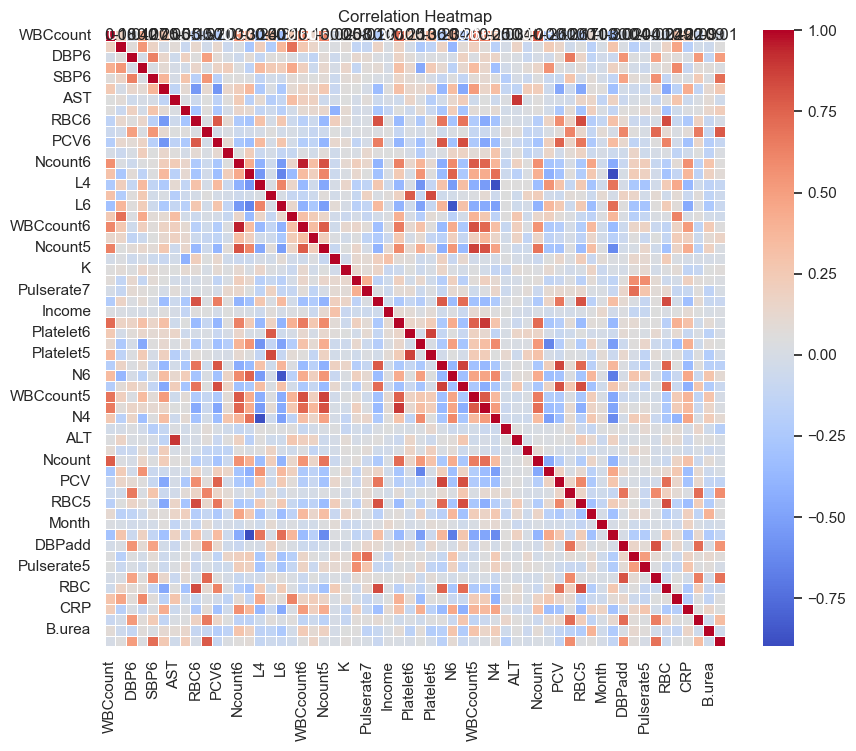

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[list(present_continuous_vars)].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [347]:
## We can see multicolineairty exist in our data set hence we need to apply any dimension rediction techniques

## *******************************************************************************************

In [348]:
impute_train.shape

(1387, 192)

In [349]:
impute_train

Year Month Hospital Sample  ICU  OPD  Sex   Age Ethnicity   Income  ...  \
0     2018    11        7      1  2.0  2.0  2.0  53.0       1.0  35000.0  ...   
1     2018     1        7      1  2.0  2.0  1.0  17.0       1.0  30000.0  ...   
2     2018     5        7      1  2.0  2.0  1.0  47.0       1.0  40000.0  ...   
3     2018     1        7      1  2.0  2.0  1.0  21.0       1.0  30000.0  ...   
4     2016     8        7      1  2.0  1.0  1.0  40.0       1.0  30000.0  ...   
...    ...   ...      ...    ...  ...  ...  ...   ...       ...      ...  ...   
1382  2019     8        4      2  2.0  2.0  1.0  62.0       1.0  30000.0  ...   
1383  2018    11        7      1  2.0  2.0  2.0  59.0       2.0  30000.0  ...   
1384  2017     9        5      1  2.0  1.0  1.0  56.0       1.0   5000.0  ...   
1385  2019     4        4      2  2.0  2.0  1.0  61.0       1.0  30000.0  ...   
1386  2017     8        8      1  2.0  2.0  1.0  36.0       1.0  30000.0  ...   

     HaemoptysisDays SOBDays ChestpainDays BleedingDays hepatictenderDays  \
0                  0       0             0            4                10   
1                  0       0             0            0                 5   
2                  0       0             0            0                 0   
3                  0       0             0            0                 0   
4                  0       0             0            0                 0   
...              ...     ...           ...          ...               ...   
1382               0       0             0            0                 0   
1383               0      10            10            0                 0   
1384               0       0             0            0                 0   
1385               0       0             0            0                 0   
1386               0       0             0            0                 0   

     hepatomegalyDays SpleenomegalyDays  LymphadenopathyDays  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   
3                   0                 0                    0   
4                   0                 0                    0   
...               ...               ...                  ...   
1382                0                 0                    0   
1383                0                 0                    0   
1384                0                 0                    0   
1385                0                 0                    0   
1386                0                 0                    0   

      NeckstiffnessDays  anyWaterArea  
0                     0             1  
1                     0             1  
2                     4             1  
3                     0             1  
4                     0             1  
...                 ...           ...  
1382                  0             1  
1383                  9             1  
1384                  0             1  
1385                  0             1  
1386                  0             2  

[1387 rows x 192 columns]

In [350]:
# Initialize counters
categorical_vars = []
continuous_vars = []

# Loop through each column to classify
for column in impute_train.columns:
    # Get the number of unique values
    unique_values = impute_train[column].nunique()
    
    # Classify based on data type and number of unique values
    if impute_train[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {impute_train.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 192
Categorical Variables: 107
Continuous Variables: 85


In [351]:
impute_train[continuous_vars]


Month   Age   Income Education   PRad  SBPadd  DBPadd  Pulserate5  \
0       11  53.0  35000.0       9.0   86.0   120.0    80.0        78.0   
1        1  17.0  30000.0      11.0   76.0   110.0    70.0        78.0   
2        5  47.0  40000.0      11.0   88.0   100.0    70.0        78.0   
3        1  21.0  30000.0      11.0   78.0   110.0    70.0        78.0   
4        8  40.0  30000.0       8.0   80.0   120.0    80.0        78.0   
...    ...   ...      ...       ...    ...     ...     ...         ...   
1382     8  62.0  30000.0      11.0   80.0   120.0    80.0        78.0   
1383    11  59.0  30000.0      11.0  100.0   104.0    72.0        78.0   
1384     9  56.0   5000.0       9.0   80.0   120.0    80.0        78.0   
1385     4  61.0  30000.0      11.0   80.0   120.0    80.0        78.0   
1386     8  36.0  30000.0      11.0   78.0   120.0    70.0        65.0   

      Pulserate6  Pulserate7  ...  ConfusionDays  CoughDays  SOBDays  \
0           78.0        86.0  ...              0          0        0   
1           76.0        80.0  ...              0          0        0   
2           78.0        80.0  ...              0          0        0   
3           78.0        80.0  ...              0          0        0   
4           78.0        80.0  ...              0          0        0   
...          ...         ...  ...            ...        ...      ...   
1382        78.0        80.0  ...              0          0        0   
1383        78.0        80.0  ...              0         10       10   
1384        78.0        80.0  ...              0          0        0   
1385        78.0        80.0  ...              0          0        0   
1386        64.0        80.0  ...              0          0        0   

      ChestpainDays  BleedingDays  hepatictenderDays  hepatomegalyDays  \
0                 0             4                 10                 0   
1                 0             0                  5                 0   
2                 0             0                  0                 0   
3                 0             0                  0                 0   
4                 0             0                  0                 0   
...             ...           ...                ...               ...   
1382              0             0                  0                 0   
1383             10             0                  0                 0   
1384              0             0                  0                 0   
1385              0             0                  0                 0   
1386              0             0                  0                 0   

      SpleenomegalyDays  LymphadenopathyDays  NeckstiffnessDays  
0                     0                    0                  0  
1                     0                    0                  0  
2                     0                    0                  4  
3                     0                    0                  0  
4                     0                    0                  0  
...                 ...                  ...                ...  
1382                  0                    0                  0  
1383                  0                    0                  9  
1384                  0                    0                  0  
1385                  0                    0                  0  
1386                  0                    0                  0  

[1387 rows x 85 columns]

In [352]:
impute_train[categorical_vars]

Year Hospital Sample  ICU  OPD  Sex Ethnicity TertiaryEducation  \
0     2018        7      1  2.0  2.0  2.0       1.0               3.0   
1     2018        7      1  2.0  2.0  1.0       1.0               3.0   
2     2018        7      1  2.0  2.0  1.0       1.0               3.0   
3     2018        7      1  2.0  2.0  1.0       1.0               3.0   
4     2016        7      1  2.0  1.0  1.0       1.0               3.0   
...    ...      ...    ...  ...  ...  ...       ...               ...   
1382  2019        4      2  2.0  2.0  1.0       1.0               3.0   
1383  2018        7      1  2.0  2.0  2.0       2.0               3.0   
1384  2017        5      1  2.0  1.0  1.0       1.0               3.0   
1385  2019        4      2  2.0  2.0  1.0       1.0               3.0   
1386  2017        8      1  2.0  2.0  1.0       1.0               3.0   

     Prophylactics Pasttreatments  ...  \
0              3.0            1.0  ...   
1              2.0            1.0  ...   
2              2.0            1.0  ...   
3              2.0            1.0  ...   
4              2.0            1.0  ...   
...            ...            ...  ...   
1382           2.0            1.0  ...   
1383           2.0            1.0  ...   
1384           2.0            1.0  ...   
1385           2.0            1.0  ...   
1386           2.0            1.0  ...   

     Acu_L.santarosaiserovarPyrogenesstr.Salinem  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1382                                         0.0   
1383                                         0.0   
1384                                         0.0   
1385                                         0.0   
1386                                         0.0   

     Acu_L.interrogansserovarBataviaestr.VanTienan  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
1382                                           0.0   
1383                                           0.0   
1384                                           0.0   
1385                                           0.0   
1386                                           0.0   

     Acu_L.interrogansserovarAlexistr.616  \
0                                     0.0   
1                                     0.0   
2                                    50.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
1382                                  0.0   
1383                                  0.0   
1384                                  0.0   
1385                                  0.0   
1386                                  0.0   

      Acu_L.interrogansserovarAustralisstr.Ballico  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
1382                                           0.0   
1383                                           0.0   
1384                                           0.0   
1385                                           0.0   
1386                                           0.0   

      Acu_L.interrogansserovarwolfiistr.3705  \
0                                        0.0   
1                                        0.0   
2               

In [353]:
impute_train

Year Month Hospital Sample  ICU  OPD  Sex   Age Ethnicity   Income  ...  \
0     2018    11        7      1  2.0  2.0  2.0  53.0       1.0  35000.0  ...   
1     2018     1        7      1  2.0  2.0  1.0  17.0       1.0  30000.0  ...   
2     2018     5        7      1  2.0  2.0  1.0  47.0       1.0  40000.0  ...   
3     2018     1        7      1  2.0  2.0  1.0  21.0       1.0  30000.0  ...   
4     2016     8        7      1  2.0  1.0  1.0  40.0       1.0  30000.0  ...   
...    ...   ...      ...    ...  ...  ...  ...   ...       ...      ...  ...   
1382  2019     8        4      2  2.0  2.0  1.0  62.0       1.0  30000.0  ...   
1383  2018    11        7      1  2.0  2.0  2.0  59.0       2.0  30000.0  ...   
1384  2017     9        5      1  2.0  1.0  1.0  56.0       1.0   5000.0  ...   
1385  2019     4        4      2  2.0  2.0  1.0  61.0       1.0  30000.0  ...   
1386  2017     8        8      1  2.0  2.0  1.0  36.0       1.0  30000.0  ...   

     HaemoptysisDays SOBDays ChestpainDays BleedingDays hepatictenderDays  \
0                  0       0             0            4                10   
1                  0       0             0            0                 5   
2                  0       0             0            0                 0   
3                  0       0             0            0                 0   
4                  0       0             0            0                 0   
...              ...     ...           ...          ...               ...   
1382               0       0             0            0                 0   
1383               0      10            10            0                 0   
1384               0       0             0            0                 0   
1385               0       0             0            0                 0   
1386               0       0             0            0                 0   

     hepatomegalyDays SpleenomegalyDays  LymphadenopathyDays  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   
3                   0                 0                    0   
4                   0                 0                    0   
...               ...               ...                  ...   
1382                0                 0                    0   
1383                0                 0                    0   
1384                0                 0                    0   
1385                0                 0                    0   
1386                0                 0                    0   

      NeckstiffnessDays  anyWaterArea  
0                     0             1  
1                     0             1  
2                     4             1  
3                     0             1  
4                     0             1  
...                 ...           ...  
1382                  0             1  
1383                  9             1  
1384                  0             1  
1385                  0             1  
1386                  0             2  

[1387 rows x 192 columns]

In [354]:
## TEST TRAIN SPLIT

In [355]:
from sklearn.model_selection import train_test_split

X = impute_train.drop(columns=['Final'])
y = impute_train['Final']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)




In [356]:
train.shape


(1109, 192)

In [357]:
test.shape

(278, 192)

In [358]:
X_train[continuous_vars]

Month   Age   Income Education  PRad  SBPadd  DBPadd  Pulserate5  \
470      5  46.0  60000.0      12.0  80.0   110.0    70.0        78.0   
92       7  36.0  40000.0      10.0  80.0   120.0    80.0        78.0   
667     10  44.0  35000.0       9.0  68.0   120.0    80.0        72.0   
858      3  59.0  30000.0      11.0  80.0   120.0    80.0        78.0   
1216     6  29.0  28000.0      12.0  80.0   120.0    70.0        78.0   
...    ...   ...      ...       ...   ...     ...     ...         ...   
87       7  56.0  25000.0      10.0  80.0   120.0    80.0        78.0   
1283     8  23.0  30000.0      12.0  80.0   120.0    80.0        78.0   
1056    12  45.0  32000.0      10.0  80.0   120.0    80.0        80.0   
1302     1  40.0  30000.0      11.0  80.0   120.0    80.0        78.0   
1281     9  34.0  50000.0      11.0  80.0   120.0    80.0        78.0   

      Pulserate6  Pulserate7  ...  ConfusionDays  CoughDays  SOBDays  \
470         78.0        80.0  ...              0          2        0   
92          78.0        80.0  ...              0          0        0   
667         76.0        70.0  ...              5          3        0   
858         78.0        80.0  ...              0          0        0   
1216        78.0        80.0  ...              0          0        0   
...          ...         ...  ...            ...        ...      ...   
87          78.0        80.0  ...              0          5        0   
1283        78.0        80.0  ...              0          0        0   
1056        70.0        78.0  ...              0          9        0   
1302        78.0        80.0  ...              0          0        0   
1281        78.0        80.0  ...              0          0        1   

      ChestpainDays  BleedingDays  hepatictenderDays  hepatomegalyDays  \
470               0             0                  0                 0   
92                0             0                  0                 0   
667               0             2                  0                 0   
858               0             0                  0                 0   
1216              0             0                  0                 0   
...             ...           ...                ...               ...   
87                0             0                  0                 0   
1283              0             0                  0                 0   
1056              0             6                  0                 0   
1302              0             0                  0                 0   
1281              0             0                  0                 0   

      SpleenomegalyDays  LymphadenopathyDays  NeckstiffnessDays  
470                   0                    0                  0  
92                    0                    0                  0  
667                   0                    0                  0  
858                   0                    0                  0  
1216                  0                    0                  0  
...                 ...                  ...                ...  
87                    0                    0                  0  
1283                  0                    0                  0  
1056                  0                    0                  0  
1302                  0                    0                  0  
1281                  0                    0                  0  

[1109 rows x 85 columns]

# APPROACH 1

# Apply PCA for those 85 continuos variables

In [365]:
## We obserwed skewed distributions hence we apply standurd scale

In [366]:


## Scaling variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.columns = X_train.columns.str.strip()
numerical_features = continuous_vars
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

X_train[continuous_vars]

Month       Age    Income  Education      PRad    SBPadd    DBPadd  \
470  -0.823659  0.252450  1.544507   0.841018 -0.048483 -0.713382 -0.945941   
92   -0.192396 -0.459753  0.332615   0.122183 -0.048483  0.279765  0.393327   
667   0.754499  0.110009  0.029642  -0.237235 -1.715710  0.279765  0.393327   
858  -1.454922  1.178314 -0.273331   0.481600 -0.048483  0.279765  0.393327   
1216 -0.508027 -0.958295 -0.394521   0.841018 -0.048483  0.279765 -0.945941   
...        ...       ...       ...        ...       ...       ...       ...   
87   -0.192396  0.964653 -0.576304   0.122183 -0.048483  0.279765  0.393327   
1283  0.123236 -1.385617 -0.273331   0.841018 -0.048483  0.279765  0.393327   
1056  1.385762  0.181230 -0.152142   0.122183 -0.048483  0.279765  0.393327   
1302 -2.086185 -0.174872 -0.273331   0.481600 -0.048483  0.279765  0.393327   
1281  0.438867 -0.602194  0.938561   0.481600 -0.048483  0.279765  0.393327   

      Pulserate5  Pulserate6  Pulserate7  ...  ConfusionDays  CoughDays  \
470    -0.083372   -0.073030    0.078874  ...      -0.187148   0.208307   
92     -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   
667    -1.171137   -0.409787   -2.065033  ...       4.425020   0.548030   
858    -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   
1216   -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   
...          ...         ...         ...  ...            ...        ...   
87     -0.083372   -0.073030    0.078874  ...      -0.187148   1.227477   
1283   -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   
1056    0.279216   -1.420057   -0.349907  ...      -0.187148   2.586371   
1302   -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   
1281   -0.083372   -0.073030    0.078874  ...      -0.187148  -0.471140   

       SOBDays  ChestpainDays  BleedingDays  hepatictenderDays  \
470  -0.319241      -0.346872     -0.278183          -0.412968   
92   -0.319241      -0.346872     -0.278183          -0.412968   
667  -0.319241      -0.346872      0.994001          -0.412968   
858  -0.319241      -0.346872     -0.278183          -0.412968   
1216 -0.319241      -0.346872     -0.278183          -0.412968   
...        ...            ...           ...                ...   
87   -0.319241      -0.346872     -0.278183          -0.412968   
1283 -0.319241      -0.346872     -0.278183          -0.412968   
1056 -0.319241      -0.346872      3.538367          -0.412968   
1302 -0.319241      -0.346872     -0.278183          -0.412968   
1281  0.133493      -0.346872     -0.278183          -0.412968   

      hepatomegalyDays  SpleenomegalyDays  LymphadenopathyDays  \
470          -0.196492          -0.105235            -0.211206   
92           -0.196492          -0.105235            -0.211206   
667          -0.196492          -0.105235            -0.211206   
858          -0.196492          -0.105235            -0.211206   
1216         -0.196492          -0.105235            -0.211206   
...                ...                ...                  ...   
87           -0.196492          -0.105235            -0.211206   
1283         -0.196492          -0.105235            -0.211206   
1056         -0.196492          -0.105235            -0.211206   
1302         -0.196492          -0.105235            -0.211206   
1281         -0.196492          -0.105235            -0.211206   

      NeckstiffnessDays  
470           -0.395848  
92            -0.395848  
667           -0.395848  
858           -0.395848  
1216          -0.395848  
...                 ...  
87            -0.395848  
1283          -0.395848  
1056          -0.395848  
1302          -0.395848  
1281          -0.395848  

[1109 rows x 85 columns]

In [367]:


## Scaling variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test.columns = X_test.columns.str.strip()
numerical_features = continuous_vars
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])

X_test[continuous_vars]

Month       Age    Income  Education      PRad    SBPadd    DBPadd  \
55    0.761181  1.019413  2.006306   0.459322  0.736787  1.095324  1.383402   
731   1.416315  0.504414 -0.220444   0.815009  0.990442  0.294851  0.375314   
466  -0.876654 -1.187728 -0.220444   0.459322 -0.024179  0.294851  0.375314   
181   1.088748 -0.010586  0.256717  -0.607738 -1.038801  0.294851  0.375314   
1099  0.761181  0.798699 -0.220444   1.170696 -0.658318 -1.306096 -0.632775   
...        ...       ...       ...        ...       ...       ...       ...   
600  -0.549087  1.607984  0.097663  -0.963425 -0.024179  0.294851  0.375314   
343  -0.221520  0.504414  0.097663   0.815009 -0.277835 -2.907043 -1.640864   
1299 -0.549087 -0.231300 -0.220444   0.459322 -0.024179  0.294851  0.375314   
778   0.106047  0.430842 -0.856658   0.815009 -0.024179  0.294851  0.375314   
31    0.106047  0.504414  2.006306   1.170696 -0.024179  0.294851  0.375314   

      Pulserate5  Pulserate6  Pulserate7  ...  ConfusionDays  CoughDays  \
55     -0.057779   -0.035850    0.065215  ...      -0.177442  -0.555974   
731    -0.057779   -0.035850    0.065215  ...      -0.177442   2.670151   
466    -0.057779   -0.035850    0.065215  ...      -0.177442  -0.555974   
181    -0.057779   -0.035850    0.065215  ...      -0.177442   0.910446   
1099    8.270982    5.870064    3.404921  ...      -0.177442  -0.555974   
...          ...         ...         ...  ...            ...        ...   
600    -0.057779   -0.035850    0.065215  ...      -0.177442   0.030594   
343     0.338829   -0.404969    0.065215  ...      -0.177442  -0.555974   
1299   -0.057779   -0.035850    0.065215  ...      -0.177442  -0.555974   
778    -0.057779   -0.035850    0.065215  ...      -0.177442  -0.555974   
31     -0.057779   -0.035850    0.065215  ...      -0.177442   0.323878   

       SOBDays  ChestpainDays  BleedingDays  hepatictenderDays  \
55   -0.372461      -0.382696     -0.266661           0.756289   
731  -0.372461       3.500137     -0.266661          -0.429322   
466  -0.372461      -0.382696     -0.266661          -0.429322   
181   1.618772       1.558720     -0.266661           1.151493   
1099 -0.372461      -0.382696     -0.266661          -0.429322   
...        ...            ...           ...                ...   
600  -0.372461      -0.382696     -0.266661          -0.429322   
343  -0.372461      -0.382696     -0.266661          -0.429322   
1299 -0.372461      -0.382696     -0.266661          -0.429322   
778  -0.372461      -0.382696     -0.266661          -0.429322   
31   -0.372461      -0.382696     -0.266661          -0.429322   

      hepatomegalyDays  SpleenomegalyDays  LymphadenopathyDays  \
55           -0.195013                0.0             2.089623   
731          -0.195013                0.0            -0.185502   
466          -0.195013                0.0            -0.185502   
181          -0.195013                0.0             2.089623   
1099         -0.195013                0.0            -0.185502   
...                ...                ...                  ...   
600          -0.195013                0.0            -0.185502   
343          -0.195013                0.0            -0.185502   
1299         -0.195013                0.0            -0.185502   
778          -0.195013                0.0            -0.185502   
31           -0.195013                0.0            -0.185502   

      NeckstiffnessDays  
55            -0.408758  
731            0.002962  
466           -0.408758  
181           -0.408758  
1099          -0.408758  
...                 ...  
600            0.002962  
343           -0.408758  
1299          -0.408758  
778           -0.408758  
31            -0.408758  

[278 rows x 85 columns]

In [368]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

In [369]:
train.shape

(1109, 192)

In [370]:
test.shape

(278, 192)

## Applying PCA

In [371]:
# Get column names of the training set
train_columns = X_train.columns

# Print the column names
print("Column names of the train set:")
print(train_columns)


Column names of the train set:
Index(['Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity', 'Income',
       ...
       'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays',
       'hepatictenderDays', 'hepatomegalyDays', 'SpleenomegalyDays',
       'LymphadenopathyDays', 'NeckstiffnessDays', 'anyWaterArea'],
      dtype='object', length=191)


In [372]:

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {impute_train.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 192
Categorical Variables: 3
Continuous Variables: 85


In [373]:
vars_to_apply_pca = continuous_vars
vars_not_to_apply_pca = [col for col in X_train.columns if col not in vars_to_apply_pca]


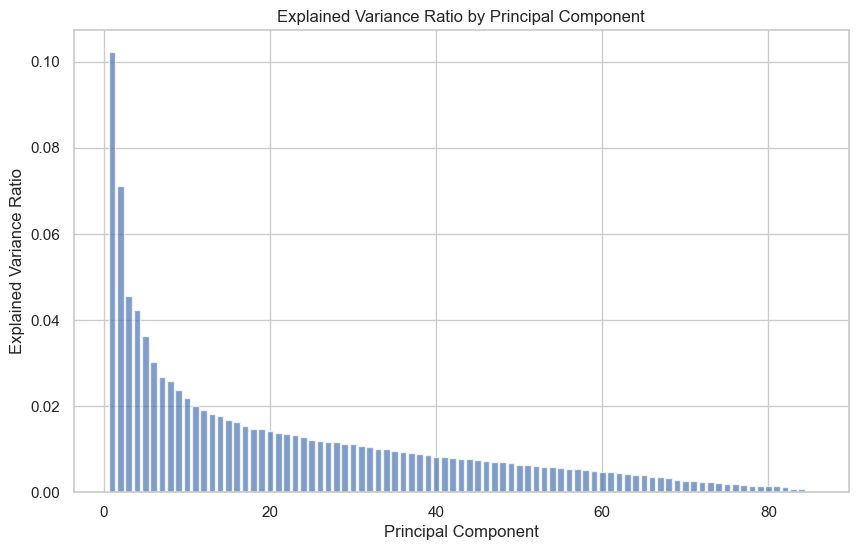

In [374]:
np.random.seed(28)
X_train_pca = X_train[vars_to_apply_pca]
scaler = StandardScaler()
X_train_pca_standardized = scaler.fit_transform(X_train_pca)

pca = PCA()
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)
explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()




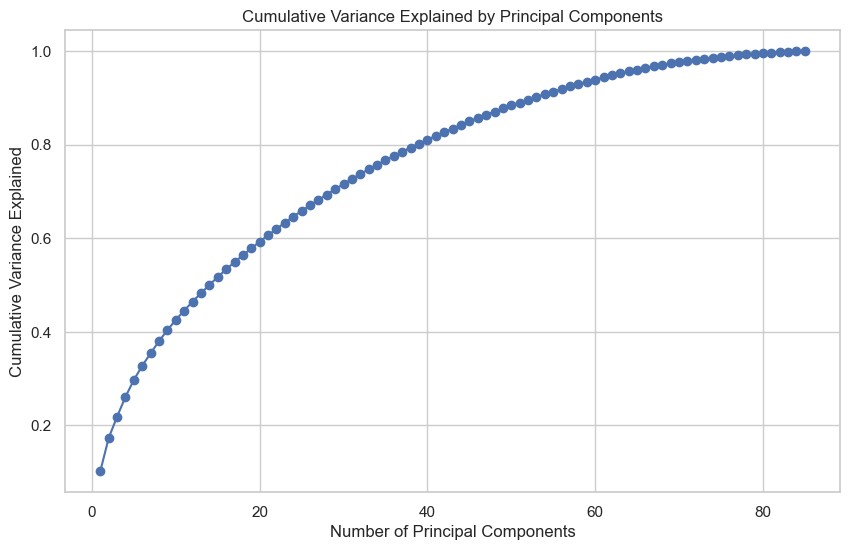

In [375]:
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


In [376]:
## PCA =40 explains more than 80% of cumelative explained variance

In [377]:

# Fit PCA with 40 components
pca = PCA(n_components=40)
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)

# Create DataFrame for X_train_pca_transformed with the index of X_train
pc_labels = [f'PC{i}' for i in range(1, 41)]  # Generate labels for PC1 to PC40
X_train_new = pd.DataFrame(data=X_train_pca_transformed, columns=pc_labels, index=X_train.index)

# Add columns not subjected to PCA
X_train_new[vars_not_to_apply_pca] = X_train[vars_not_to_apply_pca]

# Display the DataFrame
print(X_train_new.head())

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
470  -2.314950 -0.670658 -1.382543  3.261951 -0.040933 -0.742352  0.029364   
92   -1.868158 -0.345069  0.268249 -0.249845 -0.381364 -0.078565  0.683508   
667   1.326875 -3.465888 -2.498875  2.989082 -4.000523  0.763632 -0.227069   
858  -2.923038  0.980512  0.812439 -0.399710 -0.233321 -0.271832  0.263888   
1216 -1.539311  0.680868 -0.584245 -0.083261  1.350428  0.547181 -1.333651   

           PC8       PC9      PC10  ...  \
470  -0.120267 -0.643015  0.567288  ...   
92    0.025036  0.042360 -0.113650  ...   
667   0.928455  3.299542 -1.401674  ...   
858   0.337073  0.107930  0.126227  ...   
1216 -0.089768 -1.193141  0.444802  ...   

      Acu_L.santarosaiserovarGeorgiastr.LT117  \
470                                       0.0   
92                                        0.0   
667                                       0.0   
858                                       0.0   
1216                       

In [378]:
X_train_new.shape


(1109, 146)

In [379]:
X_test_pca = X_test[vars_to_apply_pca]
scaler = StandardScaler()
X_test_pca_standardized = scaler.fit_transform(X_test_pca)


# Apply the same PCA transformation on the standardized test set
X_test_pca_transformed = pca.transform(X_test_pca_standardized)

pc_labels = [f'PC{i}' for i in range(1, 41)]  # Generate labels for PC1 to PC40
X_test_new = pd.DataFrame(data=X_test_pca_transformed, columns=pc_labels, index=X_test.index)



# Create DataFrame for X_test_pca_transformed with the index of X_test
#X_test_new = pd.DataFrame(data=X_test_pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'], index=X_test.index)
#X_test_new = pd.DataFrame(data=X_test_pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X_test.index)
X_test_new[vars_not_to_apply_pca] = X_test[vars_not_to_apply_pca]


In [380]:
X_test_new.shape

(278, 146)

In [381]:
## now we can see that the number of variables has reduced to 146

In [382]:
X_train=X_train_new
X_test=X_test_new

## b. Fit a suitable predictive model to predict the leptospirosis status of the patient using the train dataset. 

In [383]:

categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
numeric_cols = X_train.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])


### Logistic regression model

In [384]:
# Logistic regression model
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [385]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

# Fit the model
logistic_model.fit(X_train, y_encoded)

# Evaluate the model
accuracy = logistic_model.score(X_train, y_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9431920649233544


In [386]:
y_train.value_counts()

Final
2    737
1    372
Name: count, dtype: int64

In [387]:
## Additional Checking whether over fitting or not

In [388]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict on the training data
train_pred = logistic_model.predict(X_train)

# Predict on the test data
test_pred = logistic_model.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_report = classification_report(y_train, train_pred)

# Evaluate the model's performance on the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_report = classification_report(y_test, test_pred)

# Print the training and test accuracy and classification reports
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)



Training Accuracy: 0.9431920649233544
Training Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.85      0.91       372
           2       0.93      0.99      0.96       737

    accuracy                           0.94      1109
   macro avg       0.95      0.92      0.93      1109
weighted avg       0.95      0.94      0.94      1109

Test Accuracy: 0.8705035971223022
Test Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.75      0.78        87
           2       0.89      0.93      0.91       191

    accuracy                           0.87       278
   macro avg       0.86      0.84      0.85       278
weighted avg       0.87      0.87      0.87       278



In [390]:
## This model is much better than previous models
## Since the Train accuracy and test accuracy difference is less than 0.005 we can consider this as not overfitting model

In [391]:
#pip install imbalanced-learn

In [392]:
#pip install scikit-learn==1.2.2

### Process test data

In [1417]:
test_data=pd.read_csv("test.csv")

In [1418]:
test=test_data.copy()

In [1419]:
test.shape

(347, 805)

In [1420]:
# Initialize counters
categorical_vars = []
continuous_vars = []

# Loop through each column to classify
for column in test_data.columns:
    # Get the number of unique values
    unique_values = test_data[column].nunique()
    
    # Classify based on data type and number of unique values
    if test_data[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {test_data.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 805
Categorical Variables: 587
Continuous Variables: 218


In [1421]:
test = test.drop('ID', axis=1)

In [1422]:
test.replace(['99', 99], np.nan, inplace=True)

In [1423]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
test.rename(columns = col_names, inplace=True)

In [1424]:
# combine some symtoms binary columns as counts

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = test[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  test[col+'Days'] = df['Days']
  test.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [1425]:
test.shape

(347, 574)

In [1426]:
#combine Psychoticsymptoms binary columns as counts

col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
test.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = test[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  test[col+'Days'] = df['Days']
  test.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [1427]:
test.shape

(347, 529)

In [1428]:
#combine water area column

cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = test[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

test['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

test.drop(cols, axis = 1, inplace = True)

In [1429]:
test.shape

(347, 526)

In [1430]:
# Drop columns with more than 50% missing values
test = test.drop(columns_to_drop_1, axis=1)

In [1431]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1']

test[cat_columns_to_convert] = test[cat_columns_to_convert].astype('category')

In [1432]:
test.isna().sum()

Year                     0
Month                    0
Hospital                 0
Sample                   0
ICU                     19
                      ... 
hepatomegalyDays        88
SpleenomegalyDays       89
LymphadenopathyDays     89
NeckstiffnessDays       85
anyWaterArea           260
Length: 450, dtype: int64

In [1433]:
test.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 450 columns):
 #    Column                                          Dtype   
---   ------                                          -----   
 0    Year                                            category
 1    Month                                           category
 2    Hospital                                        category
 3    Sample                                          category
 4    ICU                                             category
 5    OPD                                             category
 6    Sex                                             category
 7    Age                                             float64 
 8    Ethnicity                                       category
 9    Income                                          float64 
 10   Education                                       category
 11   TertiaryEducation                               category
 12   Prophy

In [1434]:
impute_test= test.copy()

impute_test= impute_test.fillna(impute_test.mode().iloc[0])

In [1435]:
columns_with_missing_values = impute_test.columns[impute_test.isna().any()]

print(columns_with_missing_values)

Index(['S.amylase6', 'S.amylase9', 'S.amylase10', 'S.phosphate2',
       'S.phosphate4', 'S.phosphate6', 'S.phosphate7', 'S.phosphate8',
       'S.phosphate9', 'S.phosphate10'],
      dtype='object')


In [1436]:
impute_test.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 450 columns):
 #    Column                                          Dtype   
---   ------                                          -----   
 0    Year                                            category
 1    Month                                           category
 2    Hospital                                        category
 3    Sample                                          category
 4    ICU                                             category
 5    OPD                                             category
 6    Sex                                             category
 7    Age                                             float64 
 8    Ethnicity                                       category
 9    Income                                          float64 
 10   Education                                       category
 11   TertiaryEducation                               category
 12   Prophy

In [1437]:
# Initialize counters
categorical_vars = []
continuous_vars = []

# Loop through each column to classify
for column in impute_test.columns:
    # Get the number of unique values
    unique_values = impute_test[column].nunique()
    
    # Classify based on data type and number of unique values
    if impute_test[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {impute_test.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 450
Categorical Variables: 217
Continuous Variables: 233


In [1438]:
impute_test[continuous_vars]


Month   Age   Income Education  Paddyfieldduration   PRad  SBPadd  DBPadd  \
0       6  49.0  20000.0       5.0                 6.0   78.0   120.0    80.0   
1       6  47.0  32000.0      10.0                 6.0   78.0   120.0    80.0   
2       6  51.0  30000.0      10.0                 6.0   78.0   120.0    80.0   
3       6  37.0  22000.0      11.0                 6.0   78.0   120.0    80.0   
4       6  55.0  30000.0      11.0                 6.0   78.0   120.0    80.0   
..    ...   ...      ...       ...                 ...    ...     ...     ...   
342    10  27.0  30000.0       9.0                 6.0   84.0   110.0    70.0   
343    10  77.0  30000.0       0.0                 6.0   80.0    80.0    60.0   
344    10  37.0  50000.0      11.0                 6.0   60.0   110.0    60.0   
345    11  32.0  30000.0      11.0                 6.0   70.0   100.0    70.0   
346    11  54.0  30000.0      11.0                 6.0  110.0    70.0    40.0   

     Pulserate2  Pulserate3  ...  OliguriaDays  JaundiceDays  PhotophobiaDays  \
0          76.0        72.0  ...             0             7                1   
1          76.0        72.0  ...             0             0                0   
2          76.0        72.0  ...             0             0                0   
3          76.0        72.0  ...             2             0                1   
4          76.0        72.0  ...             0             0                0   
..          ...         ...  ...           ...           ...              ...   
342        76.0        72.0  ...             0             0                0   
343        76.0        72.0  ...             0             0                0   
344        76.0        72.0  ...             0             0                0   
345        76.0        72.0  ...             0             0                0   
346        76.0        72.0  ...             0             0                0   

     CoughDays  SOBDays  ChestpainDays  BleedingDays  hepatictenderDays  \
0            0        7              0             0                  0   
1            0        1              0             0                  0   
2            0        0              0             0                  0   
3            0        0              0             0                  0   
4            0        0              0             0                  0   
..         ...      ...            ...           ...                ...   
342          0        0              0             0                  0   
343          0        0              0             0                  0   
344          0        0              0             0                  0   
345          0        0              0             0                  0   
346          0        0              0             0                  3   

     LymphadenopathyDays  NeckstiffnessDays  
0                      6                  6  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  
..                   ...                ...  
342                    0                  0  
343                    0                  0  
344                    0                  0  
345                    0                  0  
346                    0                  0  

[347 rows x 233 columns]

In [1439]:
impute_test[categorical_vars]

Year Hospital Sample  ICU  OPD  Sex Ethnicity TertiaryEducation  \
0    2017        1      1  2.0  2.0  1.0       1.0               3.0   
1    2017        1      1  2.0  2.0  1.0       1.0               3.0   
2    2017        1      1  2.0  2.0  1.0       1.0               3.0   
3    2017        1      1  2.0  2.0  2.0       1.0               3.0   
4    2017        1      1  2.0  1.0  1.0       1.0               3.0   
..    ...      ...    ...  ...  ...  ...       ...               ...   
342  2017        8      1  2.0  2.0  1.0       1.0               3.0   
343  2017        8      1  2.0  2.0  1.0       1.0               3.0   
344  2017        8      1  2.0  2.0  1.0       1.0               3.0   
345  2017        8      1  2.0  2.0  1.0       1.0               3.0   
346  2017        8      1  1.0  2.0  2.0       1.0               3.0   

    Prophylactics Pasttreatments  ... UFqPCRDiag Isolate MAT_set_1  \
0             2.0            2.0  ...        3.0       2       1.0   
1             2.0            1.0  ...        3.0       2       1.0   
2             1.0            1.0  ...        3.0       2       1.0   
3             2.0            1.0  ...        3.0       1       1.0   
4             2.0            1.0  ...        3.0       2       1.0   
..            ...            ...  ...        ...     ...       ...   
342           2.0            1.0  ...        2.0      98       1.0   
343           2.0            2.0  ...        3.0      98       1.0   
344           2.0            2.0  ...        3.0       2       1.0   
345           2.0            2.0  ...        3.0       2       1.0   
346           2.0            2.0  ...        3.0       2       1.0   

     MucorashDays  AnuriaDays  ConfusionDays  HaemoptysisDays  \
0               0           0              0                0   
1               0           0              0                0   
2               0           0              0                0   
3               0           0              0                0   
4               0           0              0                0   
..            ...         ...            ...              ...   
342             0           0              0                0   
343             0           0              0                0   
344             0           0              0                0   
345             0           0              0                0   
346             0           0              0                0   

     hepatomegalyDays  SpleenomegalyDays  anyWaterArea  
0                   0                  0             1  
1                   0                  0             1  
2                   0                  0             1  
3                   0                  0             1  
4                   0                  0             1  
..                ...                ...           ...  
342                 0                  0             1  
343                 0                  0             1  
344                 0                  0             1  
345                 0                  0             1  
346                 0                  0             1  

[347 rows x 217 columns]

In [1440]:


## Scaling variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
impute_test.columns = impute_test.columns.str.strip()
numerical_features = continuous_vars
impute_test[numerical_features] = scaler.fit_transform(impute_test[numerical_features])

impute_test[continuous_vars]

Month       Age    Income  Education  Paddyfieldduration      PRad  \
0   -0.505684  0.195715 -0.671690  -1.692292            0.075759 -0.141188   
1   -0.505684  0.047917 -0.208893   0.120132            0.075759 -0.141188   
2   -0.505684  0.343512 -0.286026   0.120132            0.075759 -0.141188   
3   -0.505684 -0.691071 -0.594557   0.482617            0.075759 -0.141188   
4   -0.505684  0.639107 -0.286026   0.482617            0.075759 -0.141188   
..        ...       ...       ...        ...                 ...       ...   
342  0.702388 -1.430059 -0.286026  -0.242353            0.075759  0.640603   
343  0.702388  2.264881 -0.286026  -3.504716            0.075759  0.119409   
344  0.702388 -0.691071  0.485304   0.482617            0.075759 -2.486561   
345  1.004406 -1.060565 -0.286026   0.482617            0.075759 -1.183576   
346  1.004406  0.565209 -0.286026   0.482617            0.075759  4.028364   

       SBPadd    DBPadd  Pulserate2  Pulserate3  ...  OliguriaDays  \
0    0.321842  0.454208   -0.125965   -0.220097  ...     -0.310292   
1    0.321842  0.454208   -0.125965   -0.220097  ...     -0.310292   
2    0.321842  0.454208   -0.125965   -0.220097  ...     -0.310292   
3    0.321842  0.454208   -0.125965   -0.220097  ...      0.879446   
4    0.321842  0.454208   -0.125965   -0.220097  ...     -0.310292   
..        ...       ...         ...         ...  ...           ...   
342 -0.557521 -0.718487   -0.125965   -0.220097  ...     -0.310292   
343 -3.195609 -1.891183   -0.125965   -0.220097  ...     -0.310292   
344 -0.557521 -1.891183   -0.125965   -0.220097  ...     -0.310292   
345 -1.436883 -0.718487   -0.125965   -0.220097  ...     -0.310292   
346 -4.074971 -4.236574   -0.125965   -0.220097  ...     -0.310292   

     JaundiceDays  PhotophobiaDays  CoughDays   SOBDays  ChestpainDays  \
0        2.007021        -0.045387  -0.511911  2.973321       -0.33244   
1       -0.453885        -0.403324  -0.511911  0.127135       -0.33244   
2       -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
3       -0.453885        -0.045387  -0.511911 -0.347229       -0.33244   
4       -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
..            ...              ...        ...       ...            ...   
342     -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
343     -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
344     -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
345     -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   
346     -0.453885        -0.403324  -0.511911 -0.347229       -0.33244   

     BleedingDays  hepatictenderDays  LymphadenopathyDays  NeckstiffnessDays  
0       -0.320814          -0.426840             3.304155           1.660446  
1       -0.320814          -0.426840            -0.238199          -0.472218  
2       -0.320814          -0.426840            -0.238199          -0.472218  
3       -0.320814          -0.426840            -0.238199          -0.472218  
4       -0.320814          -0.426840            -0.238199          -0.472218  
..            ...                ...                  ...                ...  
342     -0.320814          -0.426840            -0.238199          -0.472218  
343     -0.320814          -0.426840            -0.238199          -0.472218  
344     -0.320814          -0.426840            -0.238199          -0.472218  
345     -0.320814          -0.426840            -0.238199          -0.472218  
346     -0.320814           0.733318            -0.238199          -0.472218  

[347 rows x 233 columns]

In [1441]:
impute_test.shape

(347, 450)

## Applying PCA

In [1442]:
# Get column names of the training set
train_columns = impute_test.columns

# Print the column names
print("Column names of the train set:")
print(train_columns)


Column names of the train set:
Index(['Year', 'Month', 'Hospital', 'Sample', 'ICU', 'OPD', 'Sex', 'Age',
       'Ethnicity', 'Income',
       ...
       'HaemoptysisDays', 'SOBDays', 'ChestpainDays', 'BleedingDays',
       'hepatictenderDays', 'hepatomegalyDays', 'SpleenomegalyDays',
       'LymphadenopathyDays', 'NeckstiffnessDays', 'anyWaterArea'],
      dtype='object', length=450)


In [419]:

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {impute_test.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

Total Variables: 191
Categorical Variables: 111
Continuous Variables: 80


In [420]:
vars_to_apply_pca = continuous_vars
vars_not_to_apply_pca = [col for col in impute_test.columns if col not in vars_to_apply_pca]


In [421]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(28)

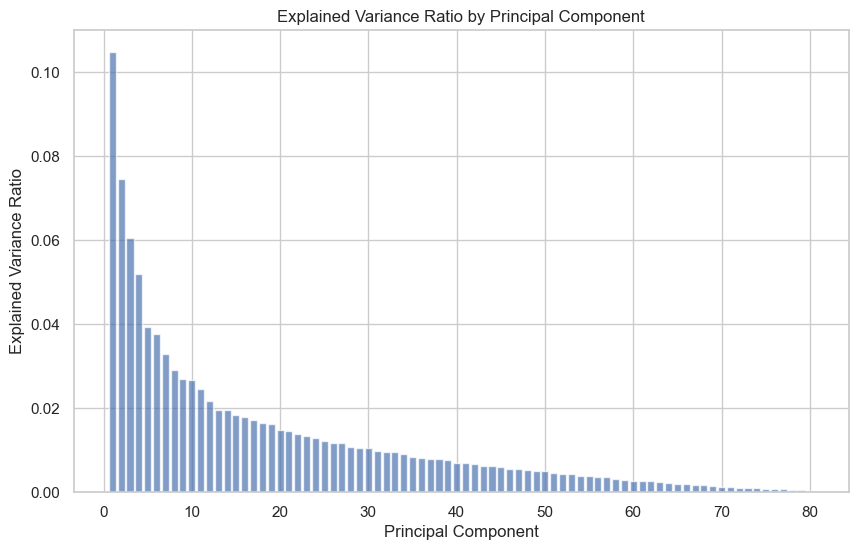

In [422]:
X_train_pca = impute_test[vars_to_apply_pca]
scaler = StandardScaler()
X_train_pca_standardized = scaler.fit_transform(X_train_pca)

pca = PCA()
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)
explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()




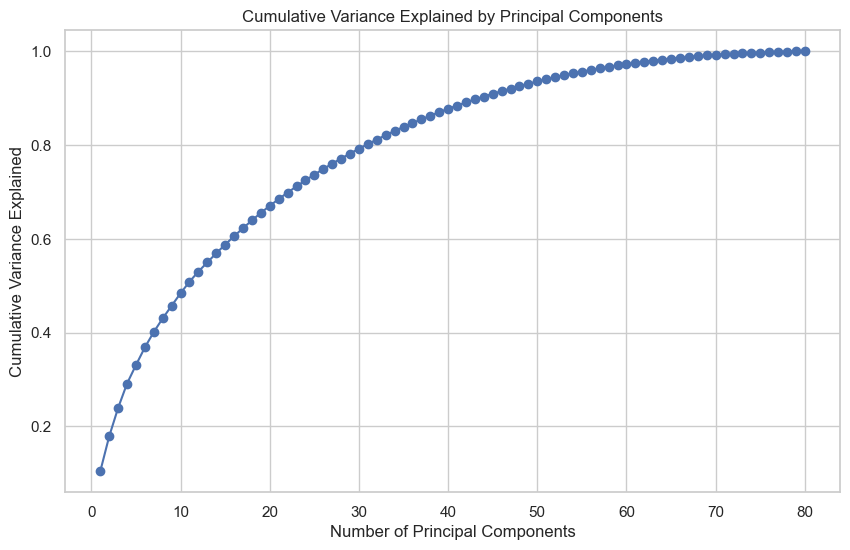

In [423]:
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


In [424]:

# Fit PCA with 40 components
pca = PCA(n_components=40)
X_train_pca_transformed = pca.fit_transform(X_train_pca_standardized)

# Create DataFrame for X_train_pca_transformed with the index of X_train
pc_labels = [f'PC{i}' for i in range(1, 41)]  # Generate labels for PC1 to PC40
X_train_new = pd.DataFrame(data=X_train_pca_transformed, columns=pc_labels, index=impute_test.index)

# Add columns not subjected to PCA
X_train_new[vars_not_to_apply_pca] = impute_test[vars_not_to_apply_pca]

# Display the DataFrame
print(X_train_new.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.509136  0.400127 -1.332964  1.203404 -0.796450  0.862265  0.370639   
1 -2.737765 -0.362642 -0.294924 -0.664197  1.494323  1.879955  0.505882   
2 -1.918435  0.190589 -1.425461  0.060297 -0.296715 -0.398225 -0.801816   
3 -0.038082  0.333552 -0.985557  0.378487 -1.356750  0.884481  0.873135   
4 -2.906232  0.725337 -1.050738 -0.139285 -0.308344 -0.401345 -0.278461   

        PC8       PC9      PC10  ...  Acu_L.interrogansserovarwolfiistr.3705  \
0 -0.815363 -2.384353  1.340347  ...                                     0.0   
1  1.655142  1.381317 -0.041762  ...                                     0.0   
2  0.066770  0.071592 -1.304439  ...                                     0.0   
3 -0.150479 -0.929737 -0.745217  ...                                     0.0   
4 -0.215690 -0.168281 -0.243324  ...                                     0.0   

   Acu_L.interrogansserovarWeerasinghe  Acu_Patoc  MucorashDays  Anu

In [425]:
X_train_new.shape


(347, 151)

## c. Get the predictions from the model for the test_data dataset. 

In [426]:

# Predict using the logistic regression model
test_pred = logistic_model.predict(X_train_new)

# Print the predictions
print(test_pred)


[1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1
 1 1 1 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2
 2 1 1 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 1 1 2 2 1 2 1 1 1 1 2]


In [427]:
predictions_df=pd.DataFrame({
    'ID': test_data['ID'],
    'Final':test_pred
})

In [428]:
predictions_df.to_csv('s15680_Final Model', index=False)